In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
from underwriting import msrp_band_analyzer_testing
TESTING_COMPANY_NAMES = [
    'TT',
    'MD',
    'DWF',
    'GHC',
    'SV',
    '99HT'
]

In [3]:
mba_test = msrp_band_analyzer_testing.MSRPTest()

In [5]:
mba_test.update_test_set(TESTING_COMPANY_NAMES)

c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C9-0000247-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-04-15
Found bad download summary for license C9-0000247-LIC on date 2022-04-12

Verifying download summaries for license CCL18-0000591...
Earliest download summary: 2021-01-01
Latest download summary: 2022-04-14

Verifying download summaries for license CDPH-10003269...
Earliest download summary: 2021-01-01
Latest download summary: 2022-04-14

Verifying download summaries for license C9-0000146-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-04-14
Found bad download summary for license C9-0000146-LIC on date 2022-04-13

Verifying download summaries for license C9-0000451-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-04-14
Found bad download summary for license C9-0000451-LIC on date 2022-03-07

Verifying download summaries for license C10-0000279-LIC...
Earliest download summary: 2021-01-01
Latest download

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gram_measure_from_product_name'] = df[product_name].str.extract('([hH][aA][lL][fF] [gG][rR][aA][mM]|[gG][rR][aA][mM])', expand=False)
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gram_measure_from_product_name'] = df[product_name].str.extract('([hH][aA][lL][fF] [gG][rR][aA][mM]|[gG][rR][aA][mM])', expand=False)
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

### Combining same product categories with different measurements ### 	


C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Breaking down product names into different brands ### 	


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Available combined product category name in costs dataframe ### 	
['flower' 'pre-roll flower' 'extract' 'edible' 'other concentrate'
 'vape cartridge' 'tincture' 'capsule' 'pre-roll infused' 'topical'
 'pre-roll leaf' 'seeds' 'infused' 'concentrate' 'shake/trim' 'shake'
 'buds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['flower' 'other concentrate' 'vape cartridge' 'extract' 'pre-roll flower'
 'tincture' 'edible' 'pre-roll infused' 'topical' 'capsule'
 'pre-roll leaf' 'seeds' 'infused' 'buds' 'bud allocated for extraction'
 'concentrate' 'shake/trim' 'shake' 'infused butter/oil']


In [6]:
mba_test.__dict__.keys()

dict_keys(['company_identifier_list', 'transfer_start_date', 'sales_start_date', 'current_month', 'measurement_dict', 'company_costs_df', 'company_sales_df', 'msrp_summary_table', 'msrp_summary_table_by_time', 'default_price_column', 'outlier_df', 'confidence_band_multiplier', 'outside_band_costs_df', 'inside_band_costs_df', 'train_band_costs_dict', 'outside_band_sales_df', 'inside_band_sales_df', 'train_band_sales_dict', 'non_compatible_timeframe_costs_df', 'non_compatible_timeframe_sales_df'])

In [7]:
mba_test.company_sales_df

license_number receipt_number rt_type sales_customer_type  \
707261  C9-0000247-LIC     0005368280  active            Consumer   
705738  C9-0000247-LIC     0007606208  active            Consumer   
705739  C9-0000247-LIC     0007606208  active            Consumer   
705740  C9-0000247-LIC     0007606207  active            Consumer   
705741  C9-0000247-LIC     0007606207  active            Consumer   
...                ...            ...     ...                 ...   
13872   C9-0000451-LIC     0177643734  active            Consumer   
13873   C9-0000451-LIC     0177643738  active            Consumer   
13874   C9-0000451-LIC     0177643697  active            Consumer   
13816   C9-0000451-LIC     0177657364  active            Consumer   
0       C9-0000451-LIC     0180056732  active            Consumer   

                         sales_datetime sales_month  total_packages  \
707261        2020-01-01 00:13:33+00:00     2020-01               2   
705738        2020-01-22 14:20:55+00:00     2020-01              10   
705739        2020-01-22 14:20:55+00:00     2020-01              10   
705740        2020-01-22 14:15:41+00:00     2020-01               2   
705741        2020-01-22 14:15:41+00:00     2020-01               2   
...                                 ...         ...             ...   
13872  2022-04-05 02:33:20.320000+00:00     2022-04               2   
13873  2022-04-05 02:31:26.617000+00:00     2022-04               1   
13874  2022-04-05 02:25:16.843000+00:00     2022-04               2   
13816  2022-04-05 03:22:52.370000+00:00     2022-04               3   
0      2022-04-15 05:23:07.483000+00:00     2022-04               2   

        rt_total_price tx_type tx_package_id          tx_package_label  \
707261           85.00  active       1389841  1A40603000071B1000000162   
705738          568.00  active       1389640  1A40603000071B1000000018   
705739          568.00  active       2083585  1A40603000092E5000010350   
705740           63.00  active       1775025  1A4060300006D0A000044576   
705741           63.00  active       2142208  1A4060300008D22000010684   
...                ...     ...           ...                       ...   
13872            43.65  active      22149607  1A406030002B8E1000009614   
13873            52.00  active      22180308  1A406030002B8E1000009686   
13874           120.00  active      22079453  1A40603000043FA000022489   
13816            47.00  active      21439594  1A4060300007DCA000028290   
0                44.80  active      22941317  1A406030000A429000379846   

                                          tx_product_name  \
707261  CRU CRU GRAND / GMO Cookies 3.5g 3.5 - Beginni...   
705738  SUMMIT BOYS SUMMIT BOYS / Gorilla Glue Caviar ...   
705739             Heavy Hitters: 1g Cart: Jack Herer [S]   
705740   Raw Garden Cartridge 0.5g Indica Mendo Punch ...   
705741              STIIIZY - Strawberry Cough Pod - 0.5g   
...                                                   ...   
13872                                           RF107-B8e   
13873                                          BAC160-B8e   
13874                      Face Lift 3.5g Private Reserve   
13816                             Cherry Pie 8th Bag Each   
0           STIIIZY - Granimals CLR - 1g - GRANIMALS - 1g   

                 tx_product_category_name tx_unit_of_measure  \
707261                             Flower              Grams   
705738  Other Concentrate (weight - each)               Each   
705739     Vape Cartridge (volume - each)               Each   
705740     Vape Cartridge (volume - each)               Each   
705741     Vape Cartridge (volume - each)               Each   
...                                   ...                ...   
13872     Flower (packaged eighth - each)               Each   
13873     Flower (packaged eighth - each)               Each   
13874     Flower (packaged eighth - each)               Each   
13816     Flower (packaged eighth - each)               Each   


In [8]:
sales_df = mba_test.company_sales_df

In [9]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Flower']

license_number receipt_number rt_type sales_customer_type  \
705753  C9-0000247-LIC     0007606202  active            Consumer   
705718  C9-0000247-LIC     0007606212  active            Consumer   
705725  C9-0000247-LIC     0007606210  active            Consumer   
705724  C9-0000247-LIC     0007606210  active            Consumer   
705720  C9-0000247-LIC     0007606212  active            Consumer   
...                ...            ...     ...                 ...   
13936   C9-0000451-LIC     0177619813  active            Consumer   
13962   C9-0000451-LIC     0177611710  active            Consumer   
13896   C9-0000451-LIC     0177635695  active            Consumer   
13849   C9-0000451-LIC     0177650114  active            Consumer   
13883   C9-0000451-LIC     0177643702  active            Consumer   

                         sales_datetime sales_month  total_packages  \
705753        2020-01-22 12:02:25+00:00     2020-01               1   
705718        2020-01-22 15:45:07+00:00     2020-01               3   
705725        2020-01-22 14:59:24+00:00     2020-01               4   
705724        2020-01-22 14:59:24+00:00     2020-01               4   
705720        2020-01-22 15:45:07+00:00     2020-01               3   
...                                 ...         ...             ...   
13936  2022-04-05 01:12:20.513000+00:00     2022-04               4   
13962  2022-04-05 00:38:58.233000+00:00     2022-04               5   
13896  2022-04-05 01:58:42.163000+00:00     2022-04               7   
13849  2022-04-05 02:56:29.960000+00:00     2022-04               2   
13883  2022-04-05 02:14:55.383000+00:00     2022-04               2   

        rt_total_price tx_type tx_package_id          tx_package_label  \
705753           56.00  active       1523548  1A4060300004C31000000896   
705718          112.00  active       1842756  1A4060300003FB1000023226   
705725           61.00  active       1389901  1A40603000071B1000000195   
705724           61.00  active       1523548  1A4060300004C31000000896   
705720          112.00  active       1842752  1A4060300003FB1000023224   
...                ...     ...           ...                       ...   
13936            56.94  active      22132704  1A406030002DB42000001323   
13962           102.60  active      22132704  1A406030002DB42000001323   
13896           139.50  active      22132704  1A406030002DB42000001323   
13849            60.36  active      22132704  1A406030002DB42000001323   
13883            43.25  active      22132704  1A406030002DB42000001323   

                                          tx_product_name  \
705753                   Entheo - Magic High Preroll Case   
705718              CRU Littles-.5g PreRoll-Trackdaddy OG   
705725  CRU CRU / Lamb's Bread Preroll 0.5g 1 - Beginn...   
705724                   Entheo - Magic High Preroll Case   
705720              CRU Littles-.5g PreRoll-Sundae Driver   
...                                                   ...   
13936                                    GG4 - 1g Preroll   
13962                                    GG4 - 1g Preroll   
13896                                    GG4 - 1g Preroll   
13849                                    GG4 - 1g Preroll   
13883                                    GG4 - 1g Preroll   

       tx_product_category_name tx_unit_of_measure  tx_quantity_sold  \
705753          Pre-Roll Flower               Each               8.0   
705718          Pre-Roll Flower               Each               1.0   
705725          Pre-Roll Flower               Each               1.0   
705724          Pre-Roll Flower               Each               1.0   
705720          Pre-Roll Flower               Each               1.0   
...                         ...                ...               ...   
13936           Pre-Roll Flower               Each               1.0   
13962           Pre-Roll Flower               Each               1.0   
13896           Pre-Roll Flower               Each      

In [10]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Flower'].extracted_units.value_counts()

1.000     24266
0.500     18447
3.500      3691
0.700      2155
0.750      1952
2.000      1610
0.350      1068
0.800       716
2.500       661
0.590       560
0.300       553
3.000       307
0.375       268
1.400       181
33.000      174
1.500        76
3.640        70
1.300        58
8.000        56
7.000        42
0.600        33
0.200        29
0.650        21
0.580        10
1.750         9
3.750         8
Name: extracted_units, dtype: int64

In [12]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Flower'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count        mean        std        min         25%  \
extracted_units                                                          
0.200               29.0   89.372414  13.515075  49.750000   95.000000   
0.300              553.0  120.868746  16.547600  62.500000  116.666667   
0.350             1068.0   95.025201  20.919346   1.171429   79.478571   
0.375              268.0  108.570498  13.356393  45.493333  106.666667   
0.500            18447.0   25.329785  26.470197   0.102500    7.500000   
0.580               10.0   72.441379   8.869860  49.637931   72.193966   
0.590              560.0   57.699546  11.798784   0.949153   55.305085   
0.600               33.0   13.252525   0.323074  12.000000   13.333333   
0.650               21.0   11.555311   0.107131  11.230769   11.553846   
0.700             2155.0    8.435320   8.670792   0.100000    5.157143   
0.750             1952.0   13.951193   3.774693   0.133333   13.333333   
0.800              716.0    6.212893   0.237156   3.125000    6.250000   
1.000            24266.0    9.495326   7.002422   0.030000    5.780000   
1.300               58.0   18.474801   2.507050  12.684615   17.692308   
1.400              181.0   13.129440   2.282920   3.571429   12.857143   
1.500               76.0   12.102105   5.582439   6.806667    7.360000   
1.750                9.0   12.599365   1.704008  10.480000   10.971429   
2.000             1610.0   11.735569   2.504448   0.370000    9.956250   
2.500              661.0   11.985628   0.364886   9.600000   12.000000   
3.000              307.0   14.964582   3.485288   8.333333   12.000000   
3.500             3691.0    9.252569   2.913319   0.011429    7.580000   
3.640               70.0   18.390895   0.839151  17.307692   17.857143   
3.750                8.0    9.158333   0.494975   7.933333    9.333333   
7.000               42.0    6.382653   0.167568   5.785714    6.428571   
8.000               56.0    4.859844   0.707399   0.052500    5.032500   
33.000             174.0    0.459204   0.031332   0.386364    0.454545   

                        50%         75%         max  
extracted_units                                      
0.200             95.000000   95.000000   95.000000  
0.300            133.333333  133.333333  133.333333  
0.350            100.000000  114.257143  189.514286  
0.375            106.666667  117.333333  125.333333  
0.500             10.000000   39.700000  108.000000  
0.580             75.413793   75.413793   83.120690  
0.590             55.762712   68.237288   68.694915  
0.600             13.333333   13.333333   13.333333  
0.650             11.553846   11.553846   11.907692  
0.700              5.242857   11.428571   62.857143  
0.750             13.693333   14.800000   21.333333  
0.800              6.250000    6.250000    6.250000  
1.000              9.000000   12.000000   72.220000  
1.300             20.030769   20.292308   20.292308  
1.400             14.285714   14.285714   14.285714  
1.500              8.293333   13.880000   21.666667  
1.750             13.714286   13.714286   15.062857  
2.000             12.750000   12.750000   19.000000  
2.500             12.000000   12.000000   14.000000  
3.000             13.333333   16.666667   24.073333  
3.500             10.000000   10.857143   18.571429  
3.640             17.857143   19.230769   20.604396  
3.750              9.333333    9.333333    9.333333  
7.000              6.428571    6.428571    6.428571  
8.000              5.032500    5.032500    5.032500  
33.000             0.454545    0.454545    0.606061

In [13]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Flower'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean        std       min      25%    50%  \
extracted_units                                                            
0.200               29.0  17.874483   2.703015   9.95000  19.0000  19.00   
0.300              553.0  36.260624   4.964280  18.75000  35.0000  40.00   
0.350             1068.0  33.258820   7.321771   0.41000  27.8175  35.00   
0.375              268.0  40.713937   5.008647  17.06000  40.0000  40.00   
0.500            18447.0  12.664892  13.235098   0.05125   3.7500   5.00   
0.580               10.0  42.016000   5.144519  28.79000  41.8725  43.74   
0.590              560.0  34.042732   6.961283   0.56000  32.6300  32.90   
0.600               33.0   7.951515   0.193845   7.20000   8.0000   8.00   
0.650               21.0   7.510952   0.069635   7.30000   7.5100   7.51   
0.700             2155.0   5.904724   6.069555   0.07000   3.6100   3.67   
0.750             1952.0  10.463394   2.831020   0.10000  10.0000  10.27   
0.800              716.0   4.970314   0.189725   2.50000   5.0000   5.00   
1.000            24266.0   9.495326   7.002422   0.03000   5.7800   9.00   
1.300               58.0  24.017241   3.259165  16.49000  23.0000  26.04   
1.400              181.0  18.381215   3.196088   5.00000  18.0000  20.00   
1.500               76.0  18.153158   8.373659  10.21000  11.0400  12.44   
1.750                9.0  22.048889   2.982015  18.34000  19.2000  24.00   
2.000             1610.0  23.471138   5.008895   0.74000  19.9125  25.50   
2.500              661.0  29.964070   0.912214  24.00000  30.0000  30.00   
3.000              307.0  44.893746  10.455865  25.00000  36.0000  40.00   
3.500             3691.0  32.383992  10.196616   0.04000  26.5300  35.00   
3.640               70.0  66.942857   3.054508  63.00000  65.0000  65.00   
3.750                8.0  34.343750   1.856155  29.75000  35.0000  35.00   
7.000               42.0  44.678571   1.172975  40.50000  45.0000  45.00   
8.000               56.0  38.878750   5.659194   0.42000  40.2600  40.26   
33.000             174.0  15.153736   1.033961  12.75000  15.0000  15.00   

                   75%    max  
extracted_units                
0.200            19.00  19.00  
0.300            40.00  40.00  
0.350            39.99  66.33  
0.375            44.00  47.00  
0.500            19.85  54.00  
0.580            43.74  48.21  
0.590            40.26  40.53  
0.600             8.00   8.00  
0.650             7.51   7.74  
0.700             8.00  44.00  
0.750            11.10  16.00  
0.800             5.00   5.00  
1.000            12.00  72.22  
1.300            26.38  26.38  
1.400            20.00  20.00  
1.500            20.82  32.50  
1.750            24.00  26.36  
2.000            25.50  38.00  
2.500            30.00  35.00  
3.000            50.00  72.22  
3.500            38.00  65.00  
3.640            70.00  75.00  
3.750            35.00  35.00  
7.000            45.00  45.00  
8.000            40.26  40.26  
33.000           15.00  20.00

In [32]:
sales_df[sales_df.tx_product_category_name == 'Pre-Roll Infused'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count        mean        std        min         25%  \
extracted_units                                                          
0.35               338.0  111.283601  18.992973   1.428571  105.114286   
0.50             12936.0   41.046280  31.028763   0.280000   14.800000   
0.60               170.0   13.809608   6.826574   1.166667   10.666667   
0.70               970.0   29.476819  24.390926   0.057143    1.185714   
0.75               333.0   42.120400   3.380586  27.106667   42.946667   
1.00             11028.0   18.538943   6.936268   0.080000   12.837500   
1.10               162.0    5.754227   3.311268   0.718182    0.754545   
1.20               868.0   20.172271   2.214521   1.666667   20.833333   
1.25               103.0   13.115495   2.571003   0.128000   11.984000   
1.30              1509.0   14.168739   4.372811   0.084615   12.384615   
1.50               938.0   10.100636   5.390286   0.106667    8.400000   
1.60                12.0   25.145312   0.044842  25.012500   25.162500   
2.00               134.0   16.971978   4.600866   5.535000   14.445000   
2.10               122.0   13.679235   1.195610   8.104762   14.014286   
2.40               715.0    9.035291   3.061011   0.058333    9.141667   
2.50                53.0   16.858189   3.275898   9.668000   14.716000   
2.60               106.0   24.833999   0.737979  20.000000   25.000000   
2.80               216.0   17.071759   2.440918  12.500000   16.071429   
3.00                83.0   12.256225   1.630001   3.333333   12.833333   
3.50               822.0   12.655638   4.836760   0.117143   10.394286   
4.40                25.0    6.757636   0.573582   4.570455    7.004545   
6.00                16.0    5.992917   0.893717   3.850000    6.311250   
8.00                 3.0   17.366667   1.192228  15.990000   17.022500   

                        50%         75%         max  
extracted_units                                      
0.35             105.114286  125.342857  137.142857  
0.50              22.340000   69.000000  132.660000  
0.60              14.800000   16.666667   36.000000  
0.70              35.821429   48.571429   94.285714  
0.75              42.946667   42.946667   48.440000  
1.00              19.765000   25.000000   49.000000  
1.10               8.072727    8.072727    8.075758  
1.20              20.833333   20.833333   23.333333  
1.25              14.368000   14.448000   16.000000  
1.30              12.384615   15.384615   26.923077  
1.50              10.733333   12.540000   21.846667  
1.60              25.162500   25.162500   25.162500  
2.00              16.385000   16.385000   32.350000  
2.10              14.014286   14.014286   15.433333  
2.40               9.141667   10.587500   15.270833  
2.50              16.000000   20.000000   22.000000  
2.60              25.000000   25.000000   25.000000  
2.80              16.071429   19.642857   19.642857  
3.00              12.833333   13.333333   13.333333  
3.50              10.540000   17.462857   21.428571  
4.40               7.004545    7.004545    7.004545  
6.00               6.416667    6.416667    6.416667  
8.00              18.055000   18.055000   18.055000

In [19]:
sales_df[sales_df.tx_product_category_name == 'Shake (Packaged Half Ounce - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean        std    min    25%    50%   75%   max
extracted_units                                                              
14.0             817.0  41.225796  16.072466  17.25  28.88  28.88  50.0  70.0

In [18]:
sales_df[(sales_df.extracted_units == 3.50)&(sales_df.tx_product_category_name == 'Flower (packaged - each)')]

license_number receipt_number rt_type sales_customer_type  \
613868  C10-0000414-LIC     0081035441  active            Consumer   
614033  C10-0000414-LIC     0080987353  active            Consumer   
614062  C10-0000414-LIC     0080916116  active            Consumer   
615105  C10-0000414-LIC     0080837347  active            Consumer   
615378  C10-0000414-LIC     0080786634  active            Consumer   
...                 ...            ...     ...                 ...   
16251    C9-0000247-LIC     0176869357  active            Consumer   
16144    C9-0000247-LIC     0176882818  active            Consumer   
15986    C9-0000247-LIC     0176900750  active            Consumer   
9302     C9-0000247-LIC     0177854172  active            Consumer   
12400    C9-0000247-LIC     0177403140  active            Consumer   

                  sales_datetime sales_month  total_packages  rt_total_price  \
613868 2021-02-20 12:47:22+00:00     2021-02               1           25.01   
614033 2021-02-20 09:03:22+00:00     2021-02               1           25.01   
614062 2021-02-19 21:36:07+00:00     2021-02               2           61.11   
615105 2021-02-19 13:08:14+00:00     2021-02               2           76.38   
615378 2021-02-19 09:09:23+00:00     2021-02               5          176.24   
...                          ...         ...             ...             ...   
16251  2022-04-01 16:32:09+00:00     2022-04               4          104.50   
16144  2022-04-01 17:14:10+00:00     2022-04               2           94.00   
15986  2022-04-01 18:06:11+00:00     2022-04               4          111.20   
9302   2022-04-05 18:56:17+00:00     2022-04               3          188.00   
12400  2022-04-03 18:08:06+00:00     2022-04               3          107.00   

       tx_type tx_package_id          tx_package_label  \
613868  active      11701113  1A4060300006D67000029556   
614033  active      11701113  1A4060300006D67000029556   
614062  active      11701113  1A4060300006D67000029556   
615105  active      11701113  1A4060300006D67000029556   
615378  active      11701113  1A4060300006D67000029556   
...        ...           ...                       ...   
16251   active      23752935  1A4060300003B66000122559   
16144   active      23752935  1A4060300003B66000122559   
15986   active      23752935  1A4060300003B66000122559   
9302    active      23752935  1A4060300003B66000122559   
12400   active      23752935  1A4060300003B66000122559   

                                    tx_product_name  tx_product_category_name  \
613868  Brothers - 1/8th Mylar - Cactus Jack - 3.5g  Flower (packaged - each)   
614033  Brothers - 1/8th Mylar - Cactus Jack - 3.5g  Flower (packaged - each)   
614062  Brothers - 1/8th Mylar - Cactus Jack - 3.5g  Flower (packaged - each)   
615105  Brothers - 1/8th Mylar - Cactus Jack - 3.5g  Flower (packaged - each)   
615378  Brothers - 1/8th Mylar - Cactus Jack - 3.5g  Flower (packaged - each)   
...                                             ...                       ...   
16251          Daze Off - Pineapple Sage 8th (3.5g)  Flower (packaged - each)   
16144          Daze Off - Pineapple Sage 8th (3.5g)  Flower (packaged - each)   
15986          Daze Off - Pineapple Sage 8th (3.5g)  Flower (packaged - each)   
9302           Daze Off - Pineapple Sage 8th (3.5g)  Flower (packaged - each)   
12400          Daze Off - Pineapple Sage 8th (3.5g)  Flower (packaged - each)   

       tx_unit_of_measure  tx_quantity_sold  tx_total_price  \
613868               Each               1.0           25.01   
614033               Each               1.0           25.01   
614062               Each               1.0           25.01   
615105               Each               1.0           25.01   
615378               Each               2.0           45.74   
...                   ...               ...             ...   
16251                Each               1.0           23.50   
16144                Each        

# Check new approach

In [11]:
temp_df = mba_test.company_sales_df

In [12]:
temp_df[temp_df.tx_product_category_name == 'Flower (packaged eighth - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count       mean        std        min        25%  \
extracted_units                                                        
1.00               171.0  55.219123  11.593213  32.780000  45.860000   
3.50             72954.0  10.110251   4.809143   0.005714   5.850000   
3.54              3749.0  14.599141   4.388315   0.053672  11.652542   
3.55              7494.0   6.900464   3.132705   0.184507   5.084507   
4.00              5164.0   6.991146   1.309580   0.207500   6.250000   
4.20               263.0   7.891557   2.288518   0.107143   5.952381   
7.00                49.0   5.422711   1.116151   3.478571   4.847143   

                       50%        75%        max  
extracted_units                                   
1.00             55.000000  70.000000  70.000000  
3.50              9.414286  13.857143  21.428571  
3.54             14.672316  16.949153  21.186441  
3.55              7.118310   8.135211  14.084507  
4.00              7.250000   7.492500   9.500000  
4.20              7.142857  10.714286  10.714286  
7.00              5.351429   5.351429   7.338571

In [13]:
temp_df[temp_df.tx_product_category_name == 'Pre-Roll Flower']

license_number receipt_number rt_type sales_customer_type  \
705753  C9-0000247-LIC     0007606202  active            Consumer   
705718  C9-0000247-LIC     0007606212  active            Consumer   
705725  C9-0000247-LIC     0007606210  active            Consumer   
705724  C9-0000247-LIC     0007606210  active            Consumer   
705720  C9-0000247-LIC     0007606212  active            Consumer   
...                ...            ...     ...                 ...   
13936   C9-0000451-LIC     0177619813  active            Consumer   
13962   C9-0000451-LIC     0177611710  active            Consumer   
13896   C9-0000451-LIC     0177635695  active            Consumer   
13849   C9-0000451-LIC     0177650114  active            Consumer   
13883   C9-0000451-LIC     0177643702  active            Consumer   

                         sales_datetime sales_month  total_packages  \
705753        2020-01-22 12:02:25+00:00     2020-01               1   
705718        2020-01-22 15:45:07+00:00     2020-01               3   
705725        2020-01-22 14:59:24+00:00     2020-01               4   
705724        2020-01-22 14:59:24+00:00     2020-01               4   
705720        2020-01-22 15:45:07+00:00     2020-01               3   
...                                 ...         ...             ...   
13936  2022-04-05 01:12:20.513000+00:00     2022-04               4   
13962  2022-04-05 00:38:58.233000+00:00     2022-04               5   
13896  2022-04-05 01:58:42.163000+00:00     2022-04               7   
13849  2022-04-05 02:56:29.960000+00:00     2022-04               2   
13883  2022-04-05 02:14:55.383000+00:00     2022-04               2   

        rt_total_price tx_type tx_package_id          tx_package_label  \
705753           56.00  active       1523548  1A4060300004C31000000896   
705718          112.00  active       1842756  1A4060300003FB1000023226   
705725           61.00  active       1389901  1A40603000071B1000000195   
705724           61.00  active       1523548  1A4060300004C31000000896   
705720          112.00  active       1842752  1A4060300003FB1000023224   
...                ...     ...           ...                       ...   
13936            56.94  active      22132704  1A406030002DB42000001323   
13962           102.60  active      22132704  1A406030002DB42000001323   
13896           139.50  active      22132704  1A406030002DB42000001323   
13849            60.36  active      22132704  1A406030002DB42000001323   
13883            43.25  active      22132704  1A406030002DB42000001323   

                                          tx_product_name  \
705753                   Entheo - Magic High Preroll Case   
705718              CRU Littles-.5g PreRoll-Trackdaddy OG   
705725  CRU CRU / Lamb's Bread Preroll 0.5g 1 - Beginn...   
705724                   Entheo - Magic High Preroll Case   
705720              CRU Littles-.5g PreRoll-Sundae Driver   
...                                                   ...   
13936                                    GG4 - 1g Preroll   
13962                                    GG4 - 1g Preroll   
13896                                    GG4 - 1g Preroll   
13849                                    GG4 - 1g Preroll   
13883                                    GG4 - 1g Preroll   

       tx_product_category_name tx_unit_of_measure  tx_quantity_sold  \
705753          Pre-Roll Flower               Each               8.0   
705718          Pre-Roll Flower               Each               1.0   
705725          Pre-Roll Flower               Each               1.0   
705724          Pre-Roll Flower               Each               1.0   
705720          Pre-Roll Flower               Each               1.0   
...                         ...                ...               ...   
13936           Pre-Roll Flower               Each               1.0   
13962           Pre-Roll Flower               Each               1.0   
13896           Pre-Roll Flower               Each      

In [14]:
idx = ((temp_df['tx_unit_of_measure'] == 'Each') &
                           (temp_df['letter_gram_measure_from_product_name'].isna() == False) &
                           (temp_df['tx_product_category_name'] == 'Pre-Roll Flower'))

In [15]:
idx.sum()

57237

In [16]:
temp_df[temp_df.tx_product_category_name == 'Vape Cartridge (weight - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count       mean        std        min        25%  \
extracted_units                                                        
0.30               356.0  82.594288  47.822428   2.233333  58.766667   
0.33                11.0  59.674931   0.274101  58.848485  59.757576   
0.35                99.0  70.689755   7.796415  47.428571  69.400000   
0.36               256.0  72.383572  34.199400   0.444444  67.451389   
0.50             14820.0  52.388832  20.719889   0.040000  39.440000   
1.00             29841.0  37.215294  13.807374   0.020000  23.660000   

                       50%         75%         max  
extracted_units                                     
0.30             83.000000  133.333333  133.333333  
0.33             59.757576   59.757576   59.757576  
0.35             75.600000   76.085714   76.085714  
0.36             82.500000  102.555556  102.555556  
0.50             51.640000   66.000000  130.000000  
1.00             37.000000   46.000000   75.000000

In [18]:
temp_df[temp_df.tx_product_category_name == 'Flower (packaged gram - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean        std     min    25%    50%    75%  \
extracted_units                                                              
1.0              7929.0   5.529694   7.312189   0.036   0.56   0.72  10.83   
2.0               251.0  10.335857   6.031122   0.370   0.83  14.44  14.44   
3.5                77.0  34.866753   6.254237  21.510  32.72  32.72  32.72   
5.0               526.0  34.157120  10.053821  17.230  22.21  36.65  36.65   

                   max  
extracted_units         
1.0              25.00  
2.0              14.44  
3.5              47.00  
5.0              55.00

In [19]:
temp_df[temp_df.tx_product_category_name == 'Flower (packaged gram - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count      mean       std       min       25%       50%  \
extracted_units                                                             
1.0              7929.0  5.529694  7.312189  0.036000  0.560000  0.720000   
2.0               251.0  5.167928  3.015561  0.185000  0.415000  7.220000   
3.5                77.0  9.961929  1.786925  6.145714  9.348571  9.348571   
5.0               526.0  6.831424  2.010764  3.446000  4.442000  7.330000   

                       75%        max  
extracted_units                        
1.0              10.830000  25.000000  
2.0               7.220000   7.220000  
3.5               9.348571  13.428571  
5.0               7.330000  11.000000

In [20]:
temp_df[temp_df.tx_product_category_name == 'Topical (volume - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean        std    min      25%    50%    75%  \
extracted_units                                                              
28.0              25.0  34.386000   5.753808  19.80  33.0000  33.00  37.80   
56.0              41.0  35.541463  11.868782  13.50  27.0000  40.00  45.00   
84.0               7.0  22.905714  21.178009   0.05   0.3850  38.74  40.26   
168.0             94.0  19.539193   3.960335   4.40  17.6525  22.00  22.00   
224.0             24.0  74.913750   8.478075  48.00  71.6475  80.00  80.00   

                   max  
extracted_units         
28.0             42.00  
56.0             52.00  
84.0             40.26  
168.0            25.00  
224.0            80.00

In [21]:
temp_df[temp_df.tx_product_category_name == 'Topical (volume - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count      mean       std       min       25%       50%  \
extracted_units                                                            
28.0              25.0  1.228071  0.205493  0.707143  1.178571  1.178571   
56.0              41.0  0.634669  0.211943  0.241071  0.482143  0.714286   
84.0               7.0  0.272687  0.252119  0.000595  0.004583  0.461190   
168.0             94.0  0.116305  0.023573  0.026190  0.105074  0.130952   
224.0             24.0  0.334436  0.037849  0.214286  0.319855  0.357143   

                      75%       max  
extracted_units                      
28.0             1.350000  1.500000  
56.0             0.803571  0.928571  
84.0             0.479286  0.479286  
168.0            0.130952  0.148810  
224.0            0.357143  0.357143

In [28]:
temp_df_c = mba_test.company_costs_df

In [30]:
temp_df_c[temp_df_c.product_category_name == 'Vape Cartridge (weight - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count       mean        std        min        25%        50%  \
extracted_units                                                                 
0.30              21.0  18.464550  18.403520   0.066667   0.066667  28.333333   
0.33               6.0  30.303030   0.000000  30.303030  30.303030  30.303030   
0.35               6.0  30.714286   3.912304  25.714286  27.500000  32.857143   
0.36              11.0  41.161616   5.802589  36.111111  36.111111  36.111111   
0.50             621.0  22.738974   8.395406   0.040000  16.760000  24.000000   
1.00             672.0  18.911629   6.504471   0.020000  18.000000  20.000000   

                       75%        max  
extracted_units                        
0.30             35.000000  41.666667  
0.33             30.303030  30.303030  
0.35             32.857143  34.285714  
0.36             47.222222  47.222222  
0.50             28.000000  50.000000  
1.00             22.500000  45.000000

In [31]:
temp_df_c[temp_df_c.product_category_name == 'Flower (packaged gram - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count       mean       std       min      25%   50%   75%  \
extracted_units                                                              
1.0               94.0   4.116625  2.870600   0.01275   1.0000   4.5   6.0   
3.0                3.0   1.000000  0.000000   1.00000   1.0000   1.0   1.0   
3.5                4.0  20.797500  2.405000  17.19000  20.7975  22.0  22.0   
5.0               11.0  14.909091  3.935849  10.00000  10.0000  18.0  18.0   

                  max  
extracted_units        
1.0              15.0  
3.0               1.0  
3.5              22.0  
5.0              18.0

In [32]:
temp_df_c[temp_df_c.product_category_name == 'Flower (packaged gram - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count      mean       std       min       25%       50%  \
extracted_units                                                            
1.0               94.0  4.116625  2.870600  0.012750  1.000000  4.500000   
3.0                3.0  0.333333  0.000000  0.333333  0.333333  0.333333   
3.5                4.0  5.942143  0.687143  4.911429  5.942143  6.285714   
5.0               11.0  2.981818  0.787170  2.000000  2.000000  3.600000   

                      75%        max  
extracted_units                       
1.0              6.000000  15.000000  
3.0              0.333333   0.333333  
3.5              6.285714   6.285714  
5.0              3.600000   3.600000

In [33]:
temp_df_c[temp_df_c.product_category_name == 'Topical (volume - each)'].groupby('extracted_units')['tx_price_per_unit'].describe()

count    mean       std   min    25%   50%    75%   max
extracted_units                                                         
28.0               2.0  16.500  2.121320  15.0  15.75  16.5  17.25  18.0
56.0               1.0  12.000       NaN  12.0  12.00  12.0  12.00  12.0
84.0               1.0  20.000       NaN  20.0  20.00  20.0  20.00  20.0
168.0              8.0   9.875  0.353553   9.0  10.00  10.0  10.00  10.0
224.0              3.0  36.000  0.000000  36.0  36.00  36.0  36.00  36.0

In [34]:
temp_df_c[temp_df_c.product_category_name == 'Topical (volume - each)'].groupby('extracted_units')['adjusted_tx_price_per_unit'].describe()

count      mean       std       min       25%       50%  \
extracted_units                                                            
28.0               2.0  0.589286  0.075761  0.535714  0.562500  0.589286   
56.0               1.0  0.214286       NaN  0.214286  0.214286  0.214286   
84.0               1.0  0.238095       NaN  0.238095  0.238095  0.238095   
168.0              8.0  0.058780  0.002104  0.053571  0.059524  0.059524   
224.0              3.0  0.160714  0.000000  0.160714  0.160714  0.160714   

                      75%       max  
extracted_units                      
28.0             0.616071  0.642857  
56.0             0.214286  0.214286  
84.0             0.238095  0.238095  
168.0            0.059524  0.059524  
224.0            0.160714  0.160714

In [36]:
temp_df.measurement_ratio_vs_gram.value_counts()

1.00      457355
3.50      152430
0.50       30362
224.00     11136
3.55        7494
14.00       6162
4.00        5910
3.54        4029
28.00       3973
7.00        3825
2.50        2869
5.00        1649
0.30        1520
56.00        826
0.33         796
182.00       511
336.00       460
0.35         378
4.20         338
2.00         299
0.36         256
0.40         117
0.20         114
112.00       113
0.70         113
616.00       107
168.00       106
4.50         103
187.60        83
176.96        66
700.00        62
29.40         32
8.00          28
84.00         14
94.64         10
17.50          1
Name: measurement_ratio_vs_gram, dtype: int64

In [37]:
temp_df.extracted_units.value_counts()

3.50      74244
1.00      51770
0.50      30362
224.00    11136
3.55       7494
4.00       5910
3.54       4029
28.00      3657
2.50       2869
5.00       1649
0.30       1520
14.00       950
56.00       826
0.33        796
182.00      511
336.00      460
0.35        378
4.20        338
2.00        299
0.36        256
0.40        117
0.20        114
112.00      113
0.70        113
616.00      107
168.00      106
4.50        103
187.60       83
176.96       66
700.00       62
7.00         56
29.40        32
8.00         28
84.00        14
94.64        10
17.50         1
Name: extracted_units, dtype: int64

In [38]:
temp_df.letter_gram_measure_from_product_name.value_counts()

3.5g     78123
1g       72274
.5g      28983
0.5g     28968
1.0g     14380
         ...  
6g           8
0.15g        8
3 G          3
17.5g        1
1.5 G        1
Name: letter_gram_measure_from_product_name, Length: 124, dtype: int64

### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.4155707522356654 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.6065228826933193 %


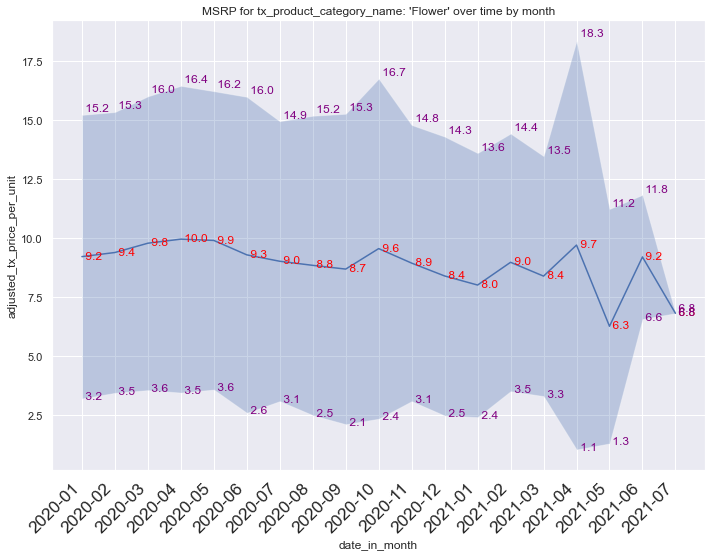

### % outliers for column category name Flower is 15.18% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.8327356247733406 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.436394407059677 %


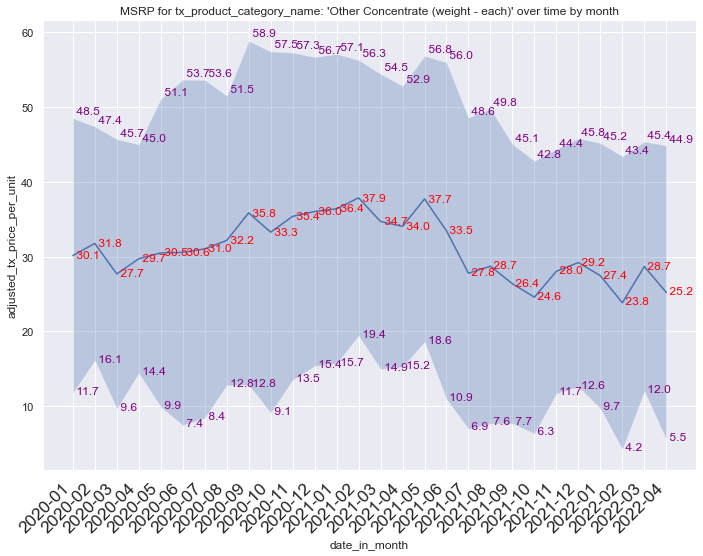

### % outliers for column category name Other Concentrate (weight - each) is 22.68% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.9670048441641531 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.2014441093135915 %


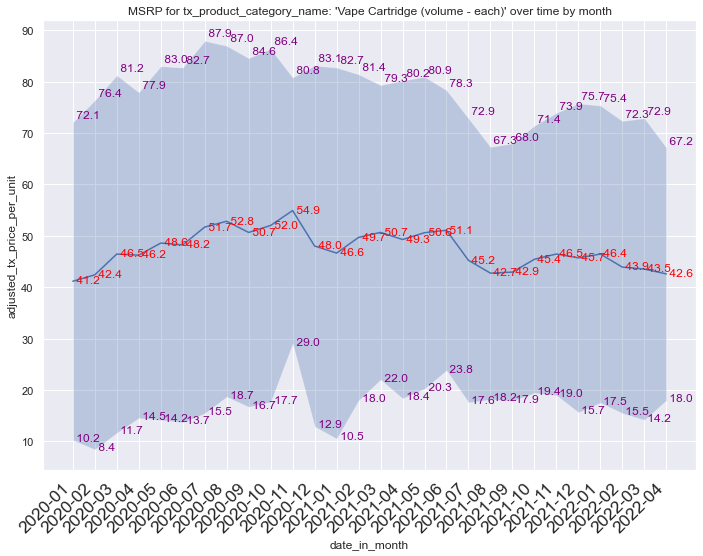

### % outliers for column category name Vape Cartridge (volume - each) is 11.700000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.509118615740058 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.888806960625278 %


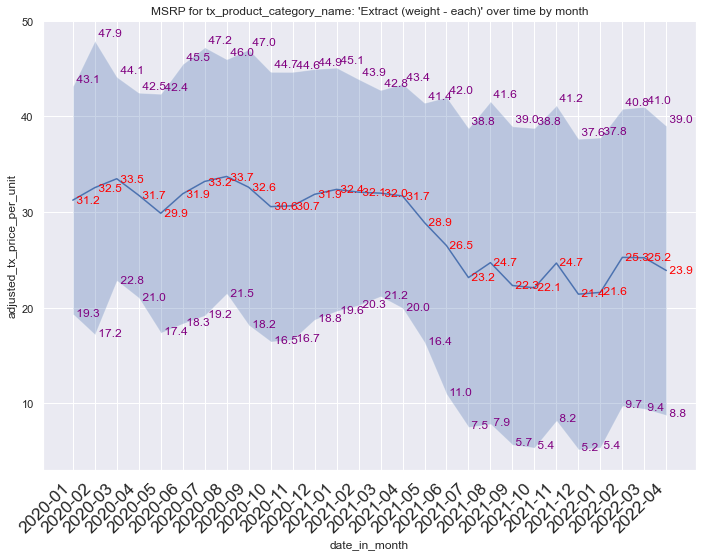

### % outliers for column category name Extract (weight - each) is 14.940000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 19.31841139139097 %


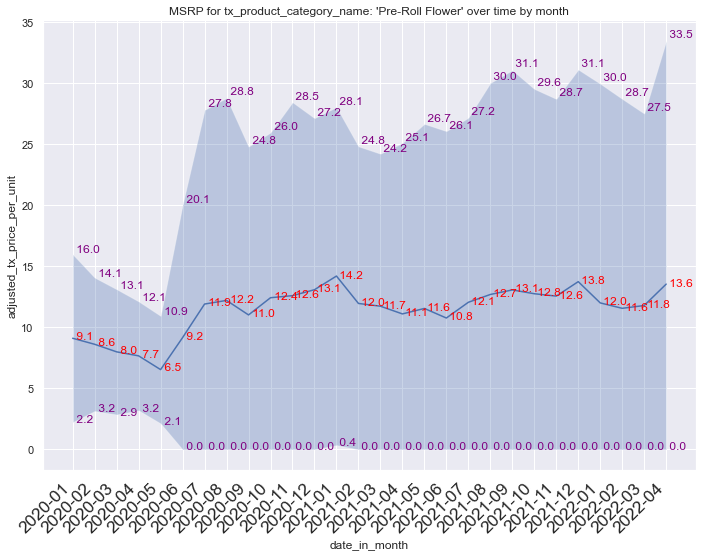

### % outliers for column category name Pre-Roll Flower is 20.91% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.200069710700593 %


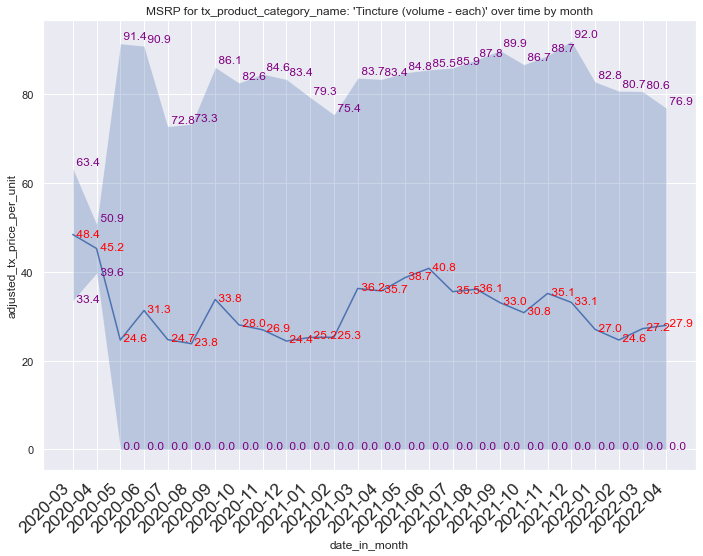

### % outliers for column category name Tincture (volume - each) is 6.05% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.52054290582404 %


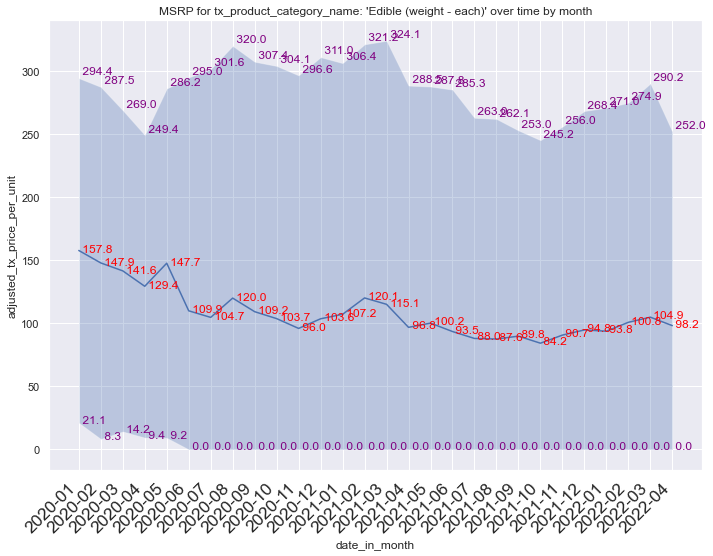

### % outliers for column category name Edible (weight - each) is 0.27% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 20.715532286212916 %


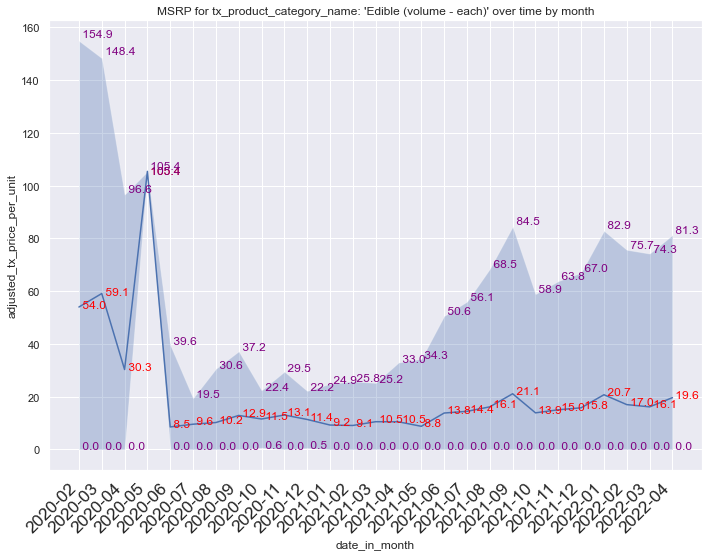

### % outliers for column category name Edible (volume - each) is 1.9% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 17.80225344980377 %


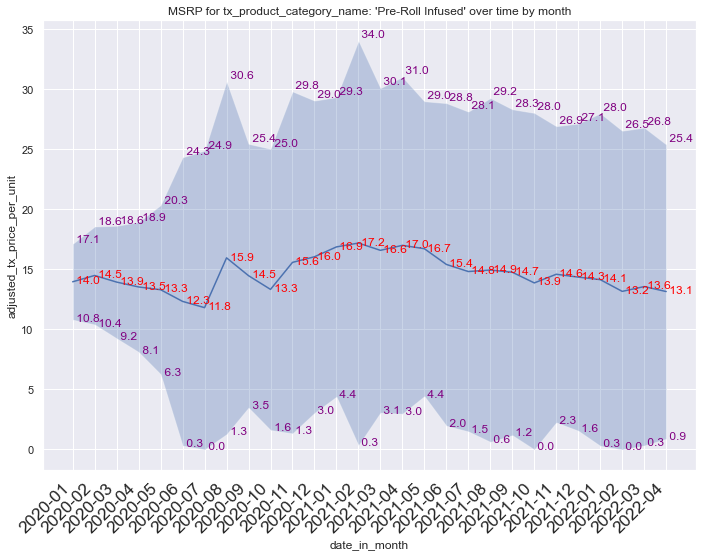

### % outliers for column category name Pre-Roll Infused is 29.220000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.680538555691554 %


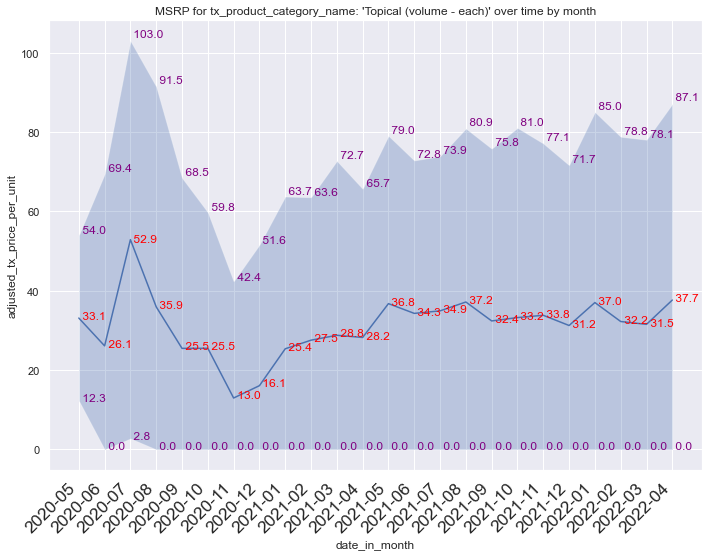

### % outliers for column category name Topical (volume - each) is 19.900000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 16.49628252788104 %


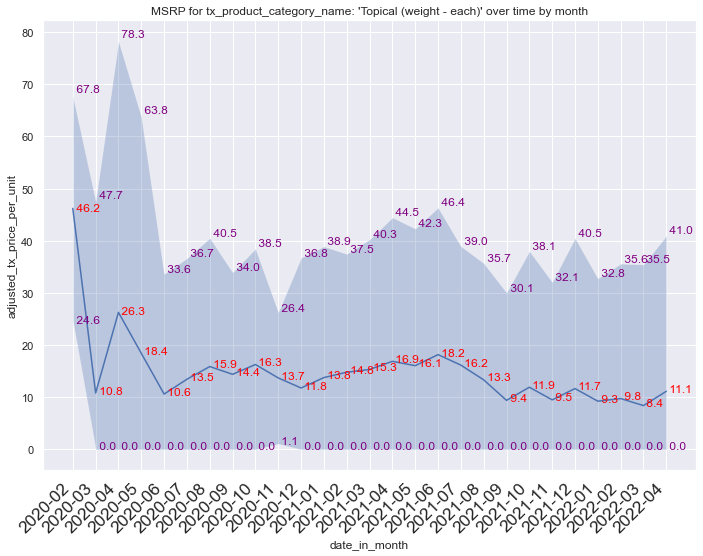

### % outliers for column category name Topical (weight - each) is 15.72% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Capsule (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.02576112412178 %


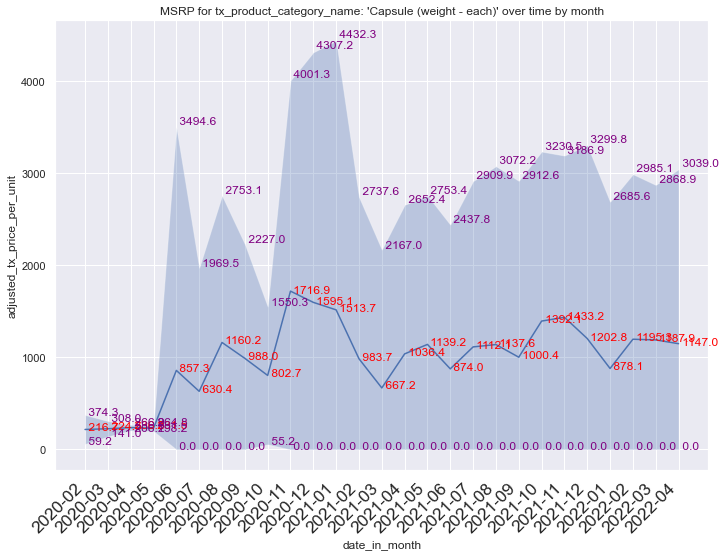

### % outliers for column category name Capsule (weight - each) is 8.55% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 9.090909090909092 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


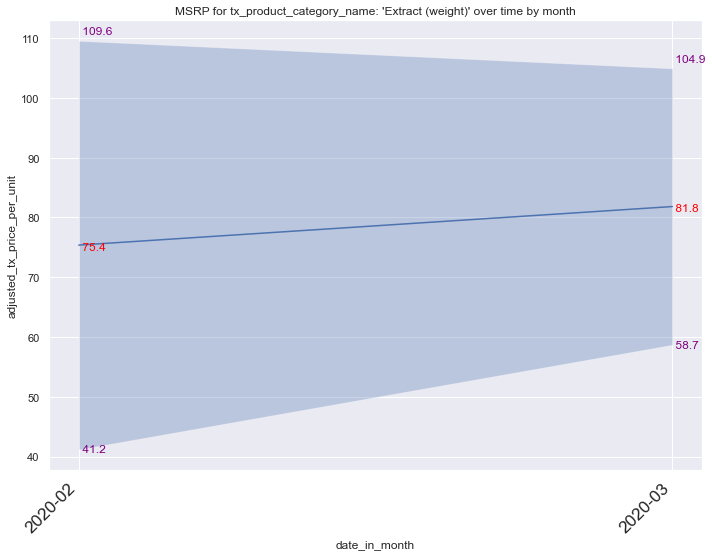

### % outliers for column category name Extract (weight) is 87.72% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.5806304637566375 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.6299016789940515 %


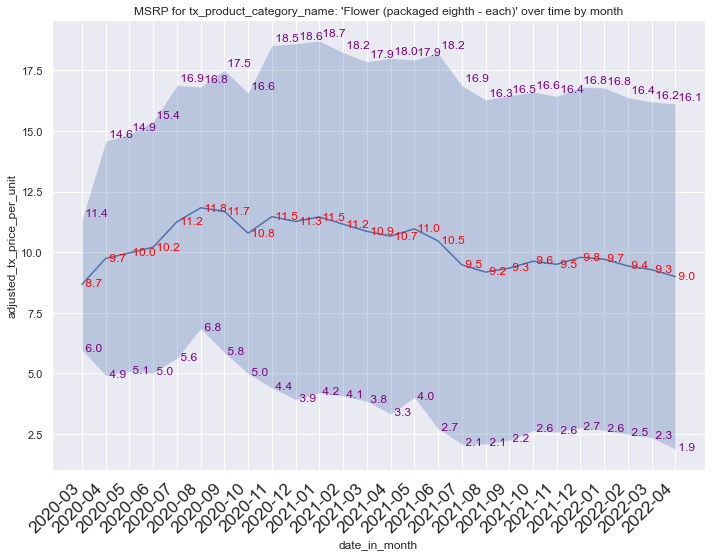

### % outliers for column category name Flower (packaged eighth - each) is 11.27% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Leaf ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.167442156925234 %


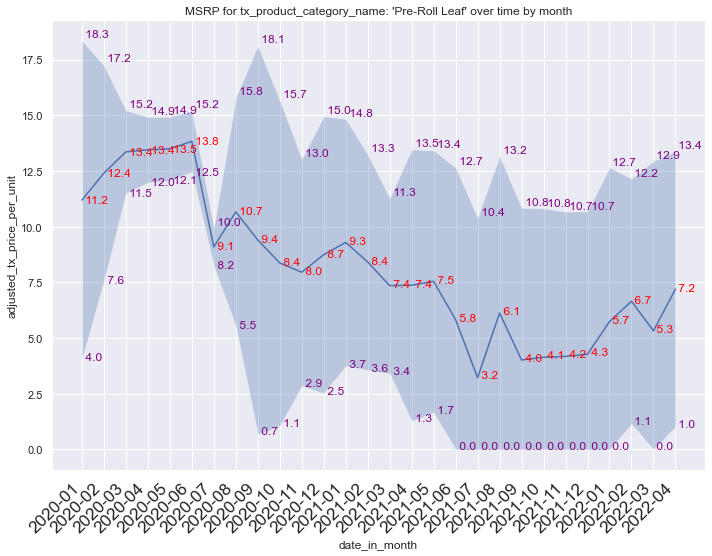

### % outliers for column category name Pre-Roll Leaf is 16.61% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.140786749482402 %


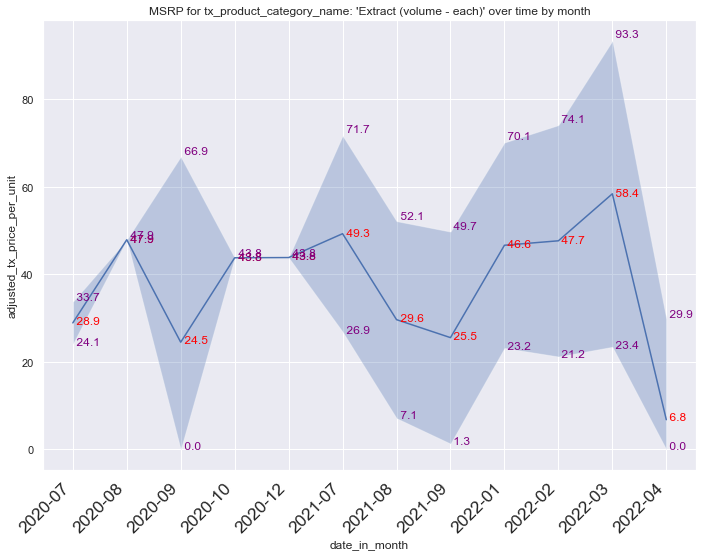

### % outliers for column category name Extract (volume - each) is 39.79% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.3142690666468635 %


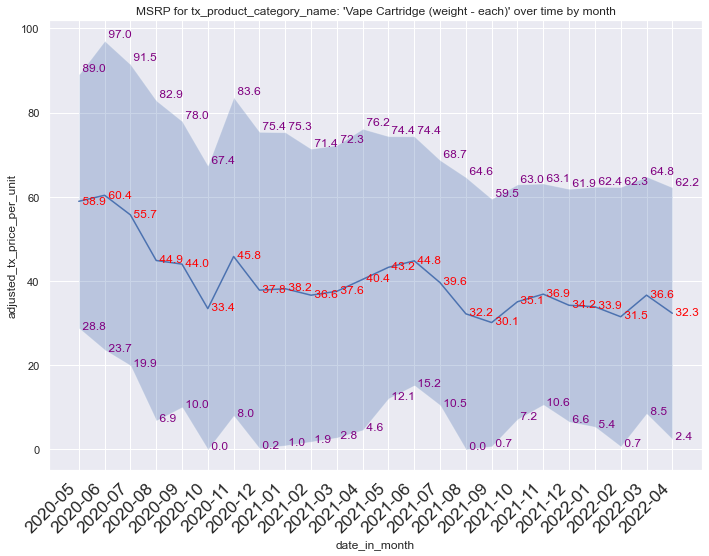

### % outliers for column category name Vape Cartridge (weight - each) is 10.12% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Seeds (each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.8461538461538463 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


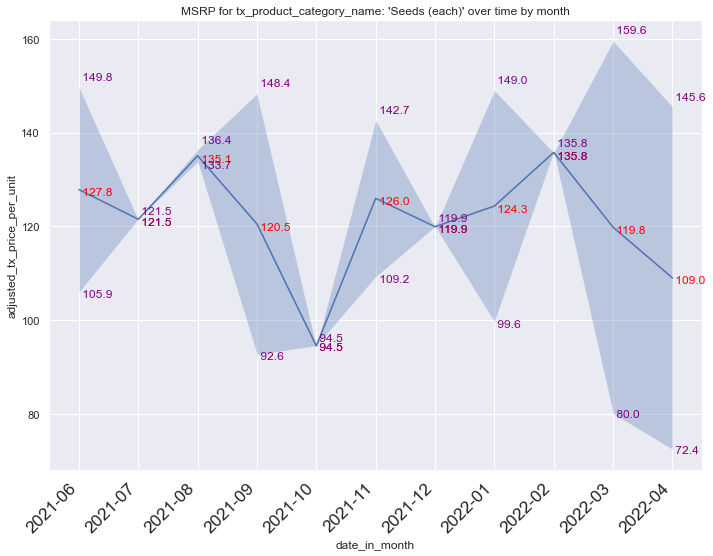

### % outliers for column category name Seeds (each) is 93.67999999999999% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged quarter - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.17627263500881363 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.362961380268148 %


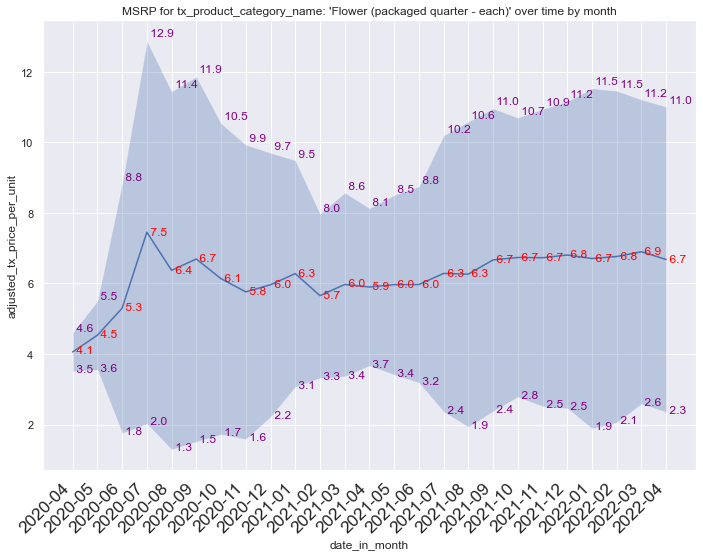

### % outliers for column category name Flower (packaged quarter - each) is 20.91% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.4551403478560359 %


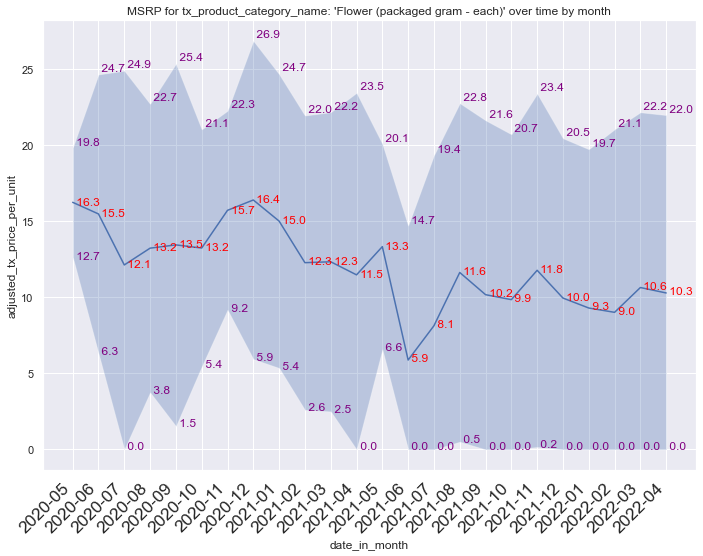

### % outliers for column category name Flower (packaged gram - each) is 4.31% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.857677635566331 %


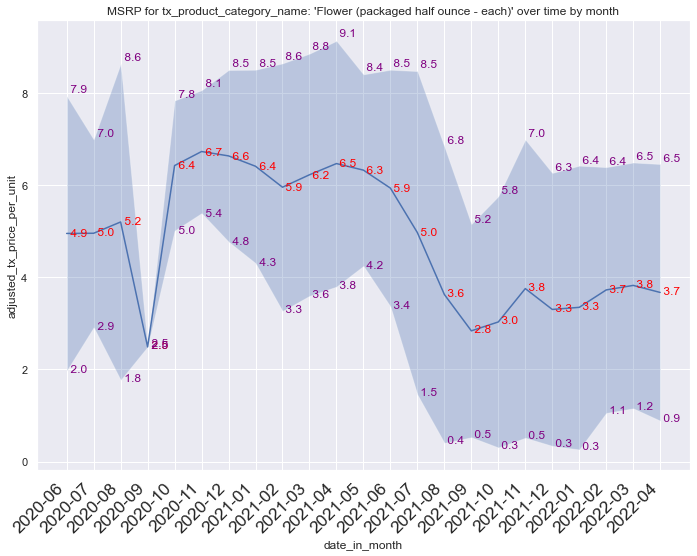

### % outliers for column category name Flower (packaged half ounce - each) is 46.72% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 15.595666596090055 %


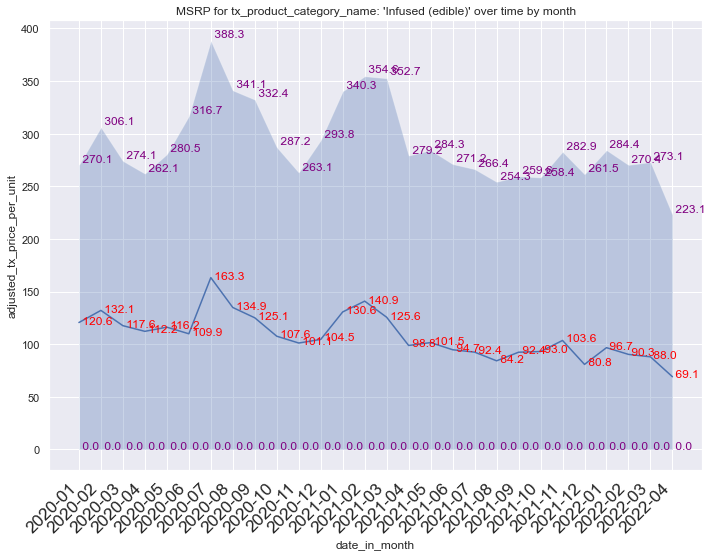

### % outliers for column category name Infused (edible) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Buds ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.25045660604230124 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.573001404722489 %


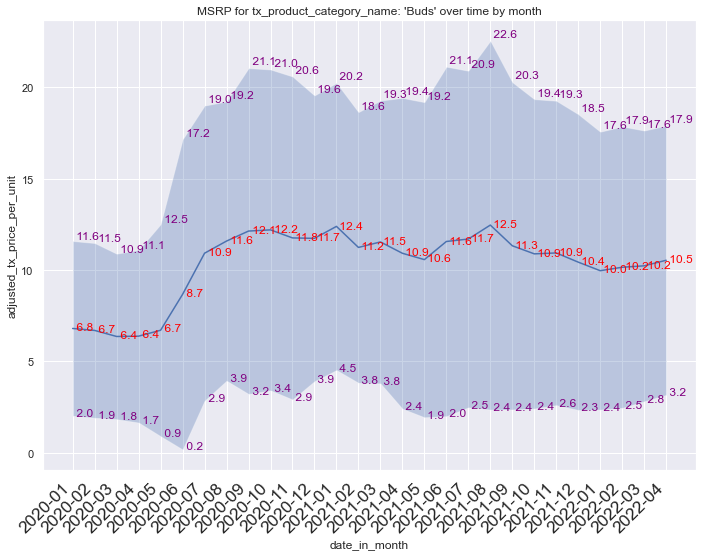

### % outliers for column category name Buds is 1.81% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Bud allocated for extraction ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (non-edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 18.350515463917525 %


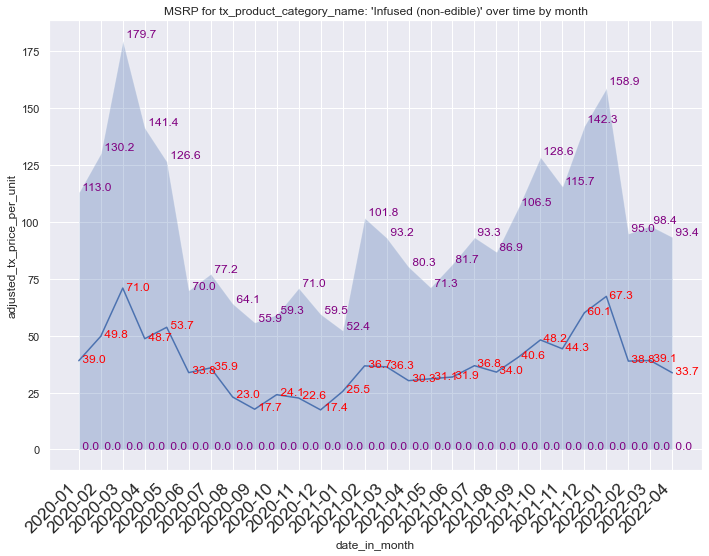

### % outliers for column category name Infused (non-edible) is 0.27% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate (Each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.1830189032729455 %


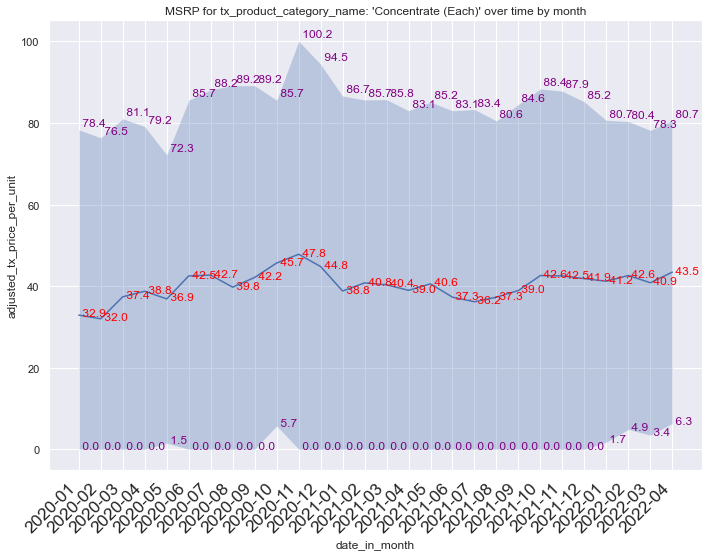

### % outliers for column category name Concentrate (Each) is 6.01% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.939390808753895 %


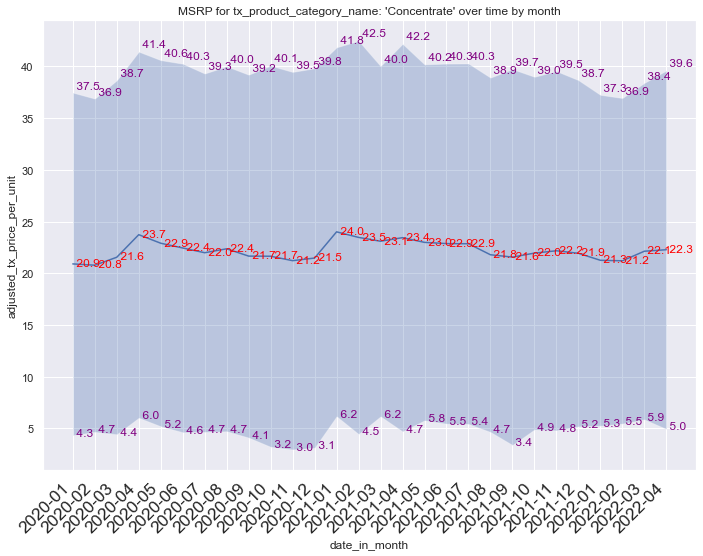

### % outliers for column category name Concentrate is 20.22% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim (by strain) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.9187134712610705 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.726666427623794 %


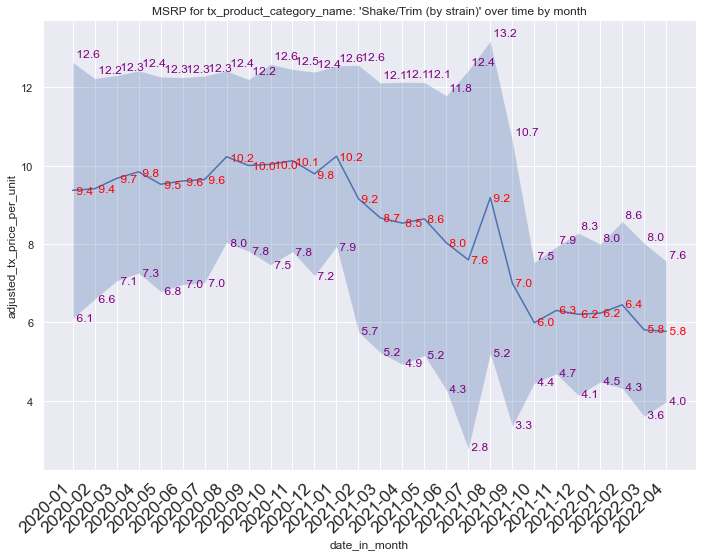

### % outliers for column category name Shake/Trim (by strain) is 27.950000000000003% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.671415850400712 %


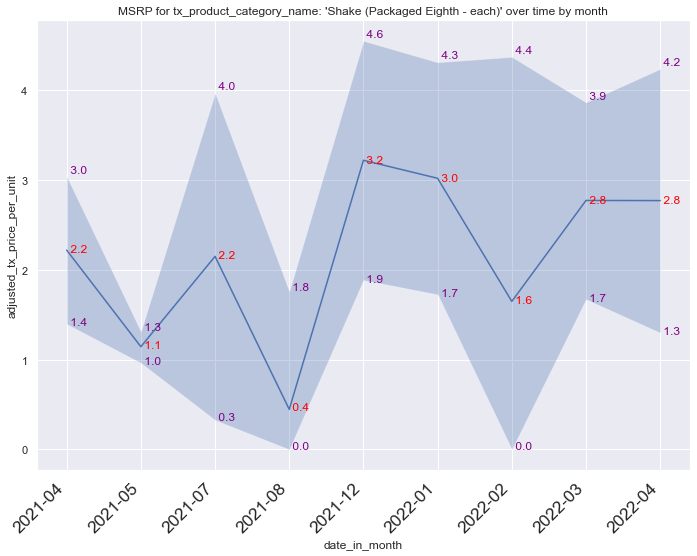

### % outliers for column category name Shake (Packaged Eighth - each) is 72.39% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Half Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 9.243697478991598 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.129510627780524 %


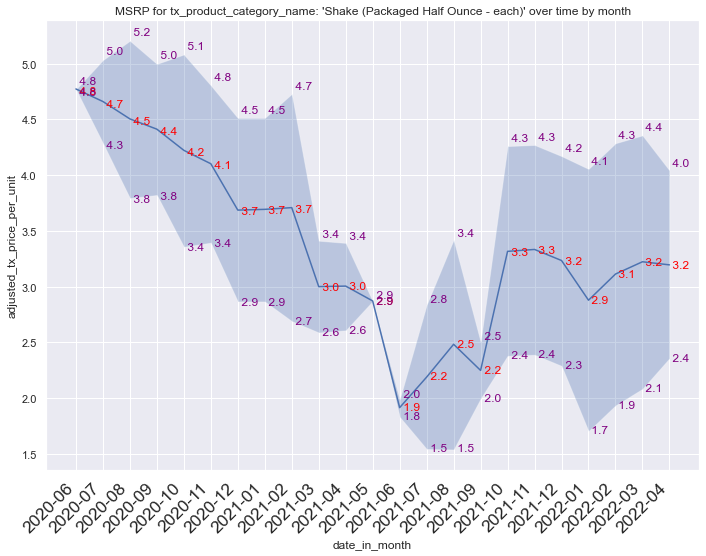

### % outliers for column category name Shake (Packaged Half Ounce - each) is 83.27% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 14.486340900346287 %


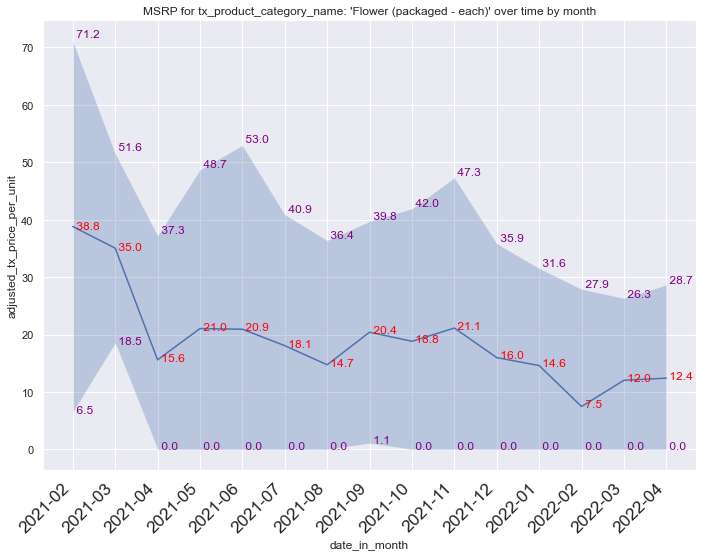

### % outliers for column category name Flower (packaged - each) is 18.59% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 7.866868381240545 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.084720121028744 %


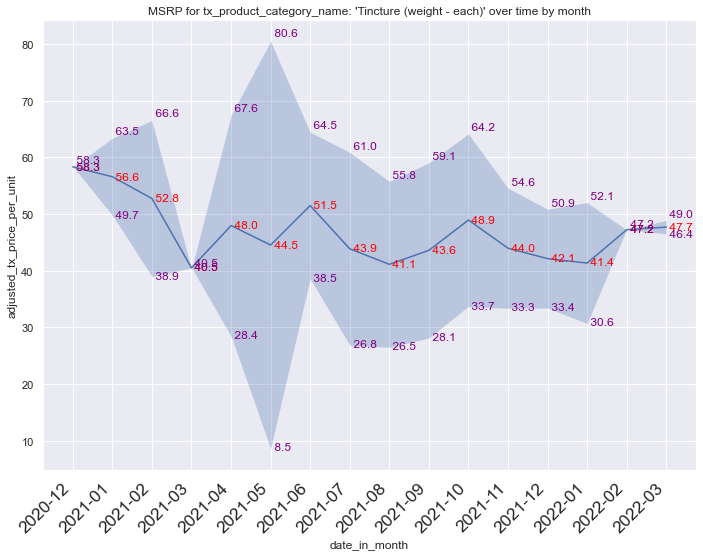

### % outliers for column category name Tincture (weight - each) is 64.71000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.02563116749967961 %
Number of transactions outliers above Boxplot Whisker Maximum is 19.428424964757145 %


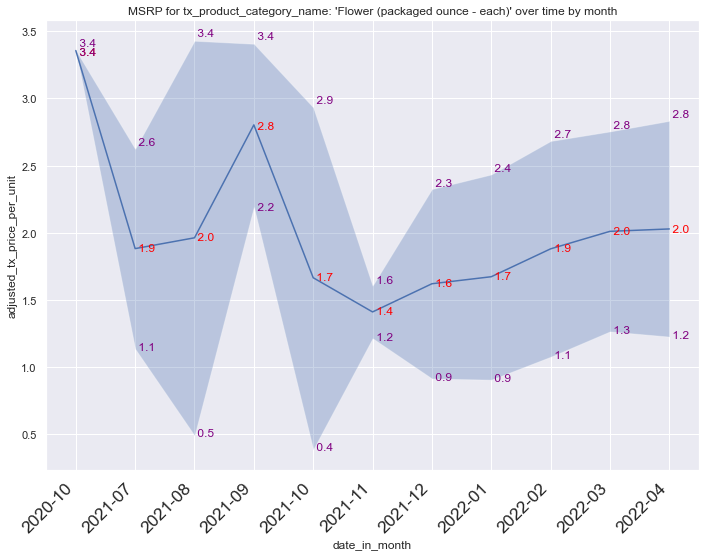

### % outliers for column category name Flower (packaged ounce - each) is 62.27% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.623762376237623 %


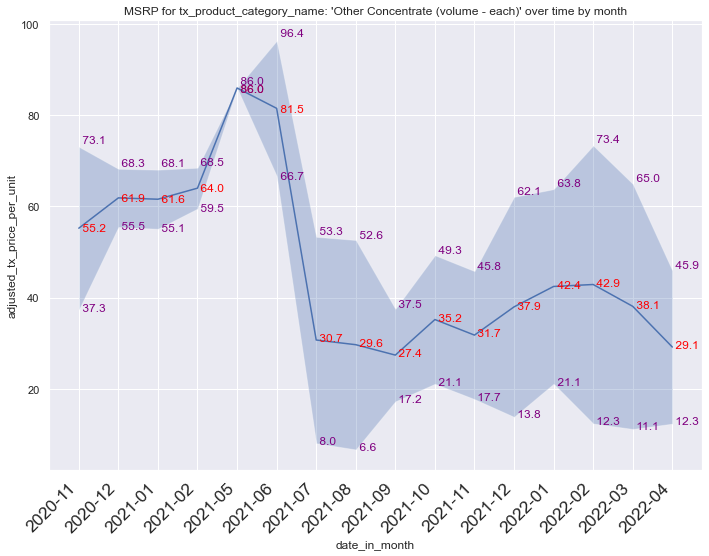

### % outliers for column category name Other Concentrate (volume - each) is 46.6% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 13.20754716981132 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.9433962264150944 %


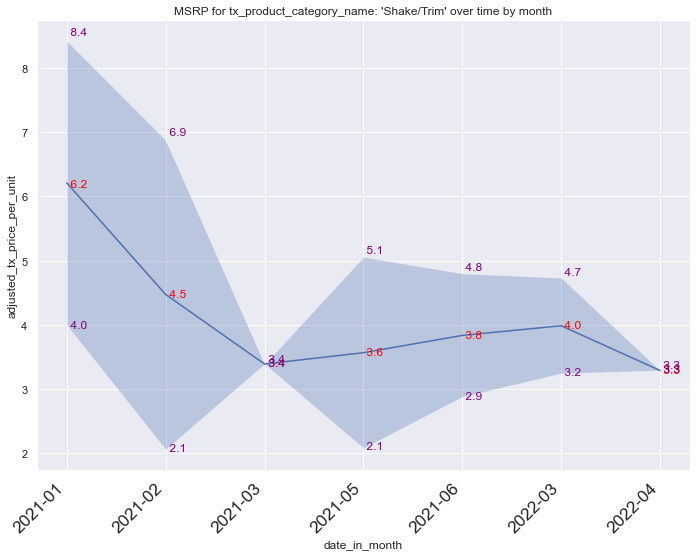

### % outliers for column category name Shake/Trim is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.1437908496732025 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.941176470588235 %


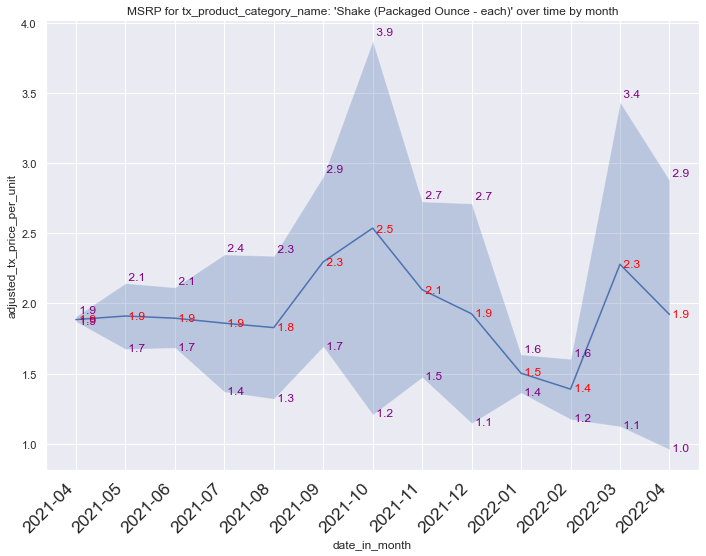

### % outliers for column category name Shake (Packaged Ounce - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.272727272727273 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.1363636363636365 %


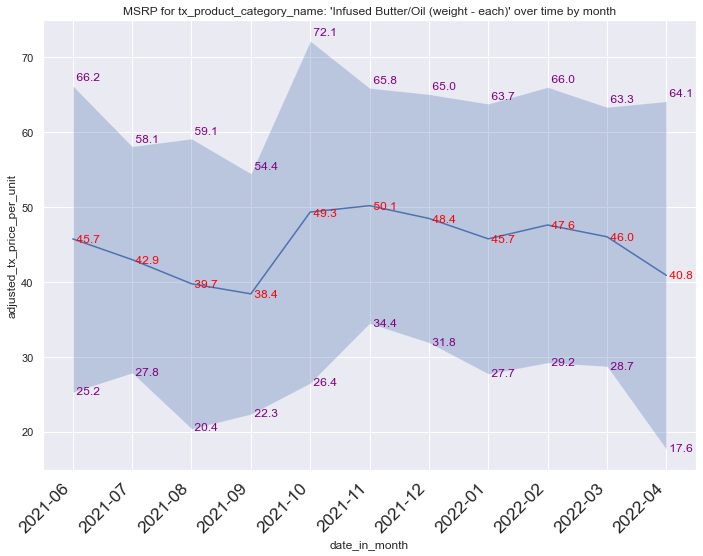

### % outliers for column category name Infused Butter/Oil (weight - each) is 20.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.518891687657431 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.070528967254408 %


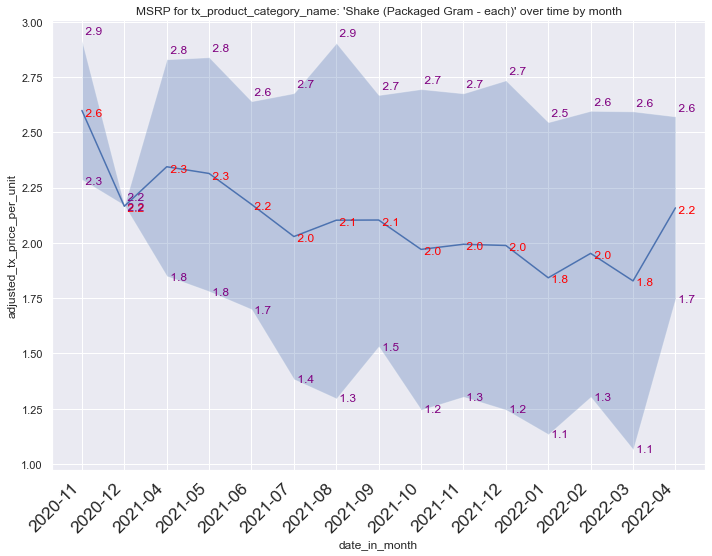

### % outliers for column category name Shake (Packaged Gram - each) is 100.0% ###
### Overall % outliers that are outside of time series band in column tx_product_category_name is 11.700000000000001% ###


In [40]:
mba_test.compare_entire_data_band('tx_product_category_name', 'S', use_unit_converted_price=True, ignore_non_unit_extractable_rows=False)

### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.2935323383084576 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.960199004975125 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


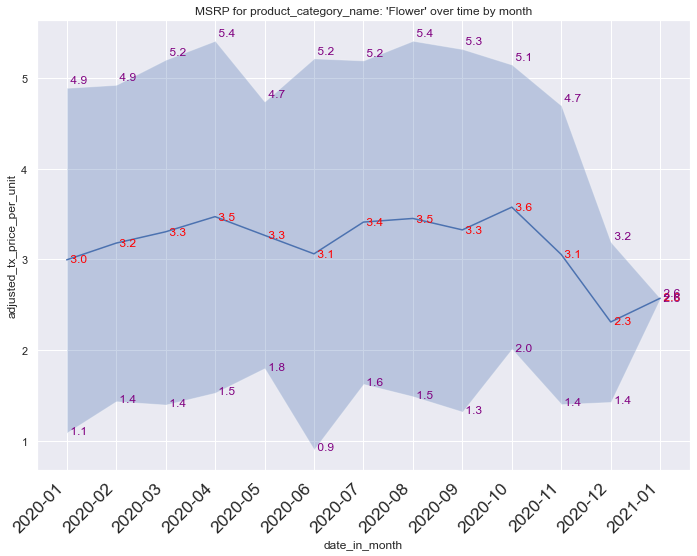

### % outliers for column category name Flower is 34.07% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.679682020107553 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


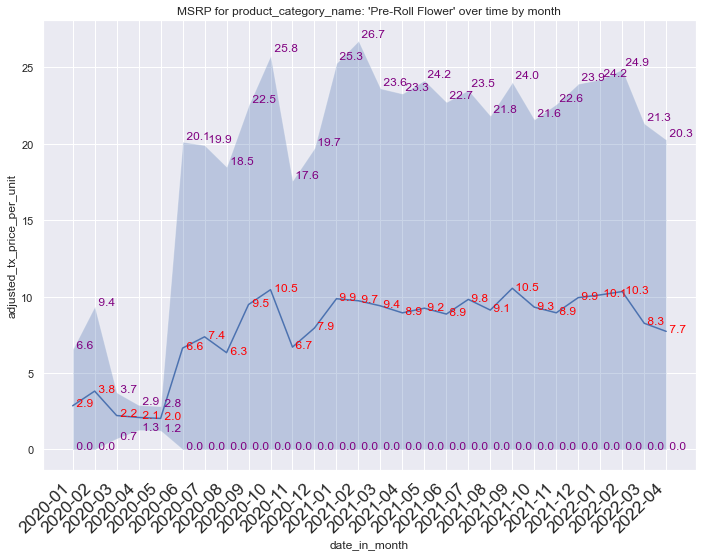

### % outliers for column category name Pre-Roll Flower is 6.58% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 4.75 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.025 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


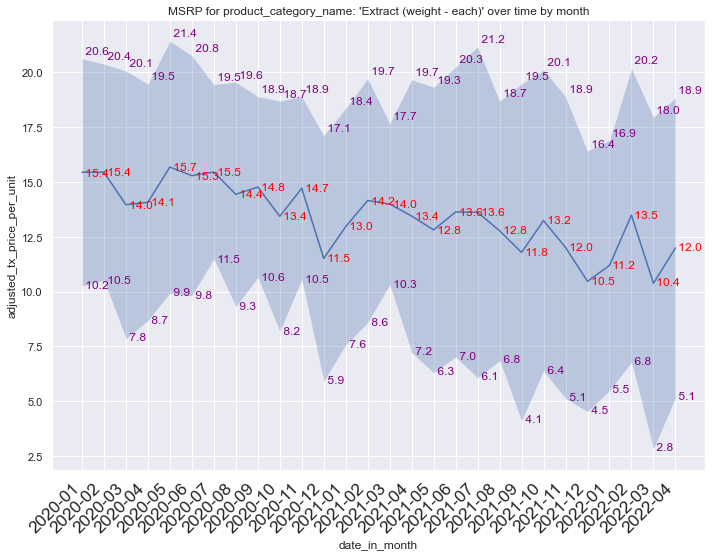

### % outliers for column category name Extract (weight - each) is 25.480000000000004% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.981104860810616 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


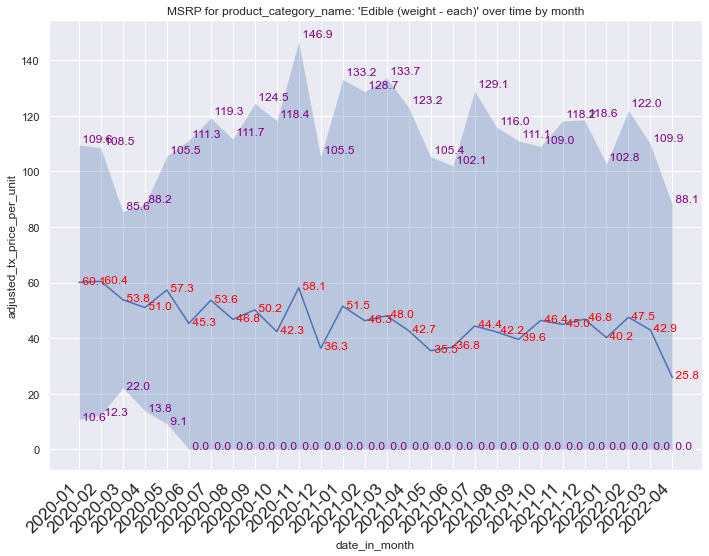

### % outliers for column category name Edible (weight - each) is 5.5% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 4.92030492030492 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.127512127512126 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


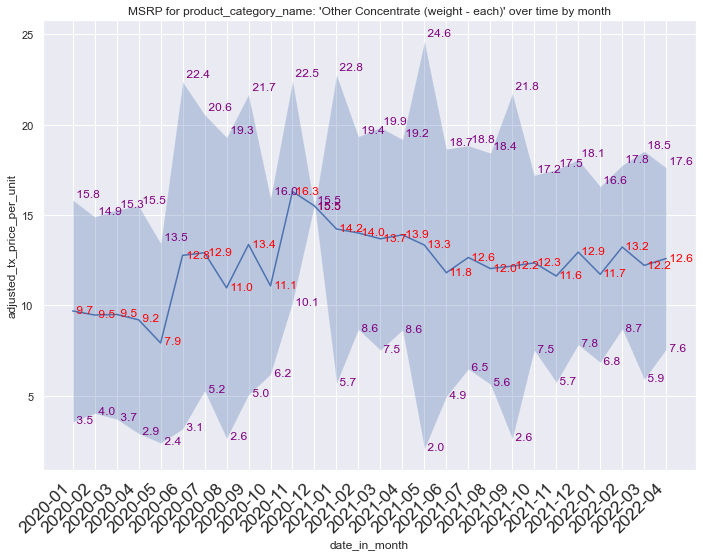

### % outliers for column category name Other Concentrate (weight - each) is 32.14% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.251599147121535 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.579246624022743 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


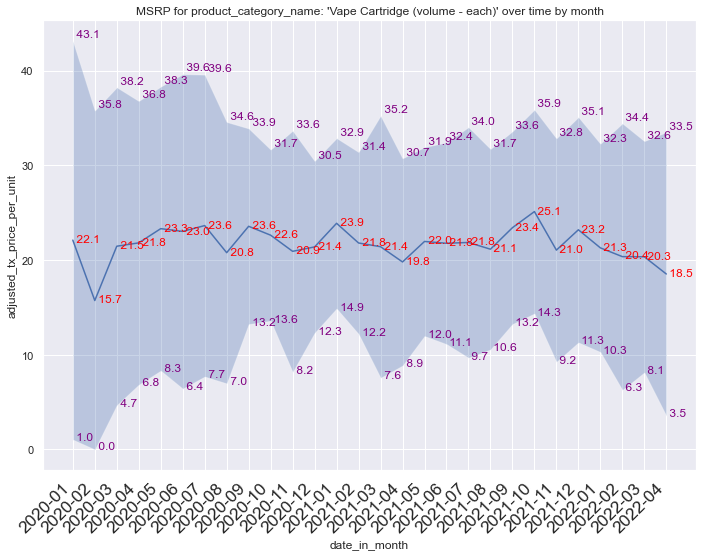

### % outliers for column category name Vape Cartridge (volume - each) is 8.59% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.7580144777662874 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


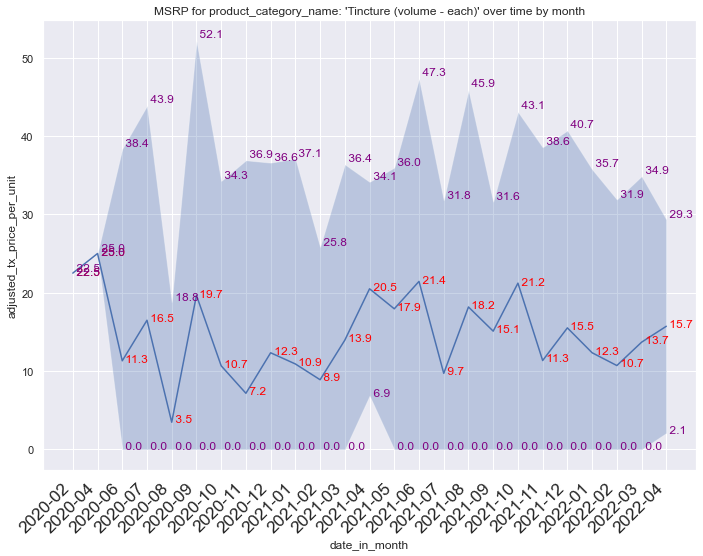

### % outliers for column category name Tincture (volume - each) is 13.530000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Capsule (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.111111111111111 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


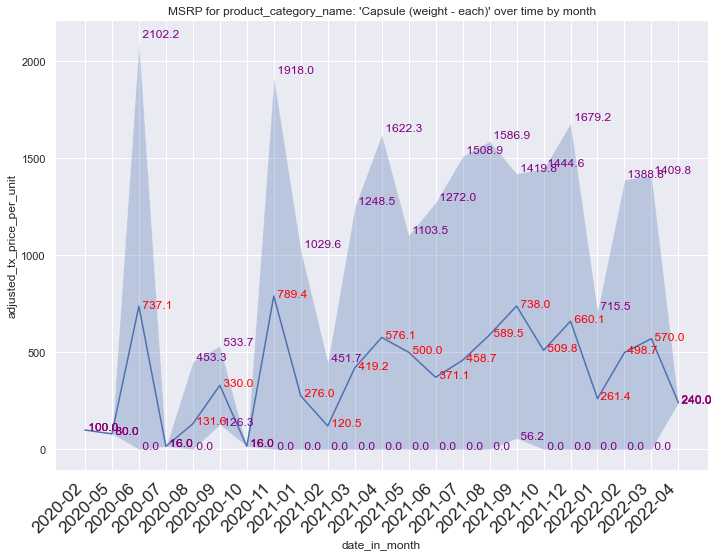

### % outliers for column category name Capsule (weight - each) is 17.75% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 17.51824817518248 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


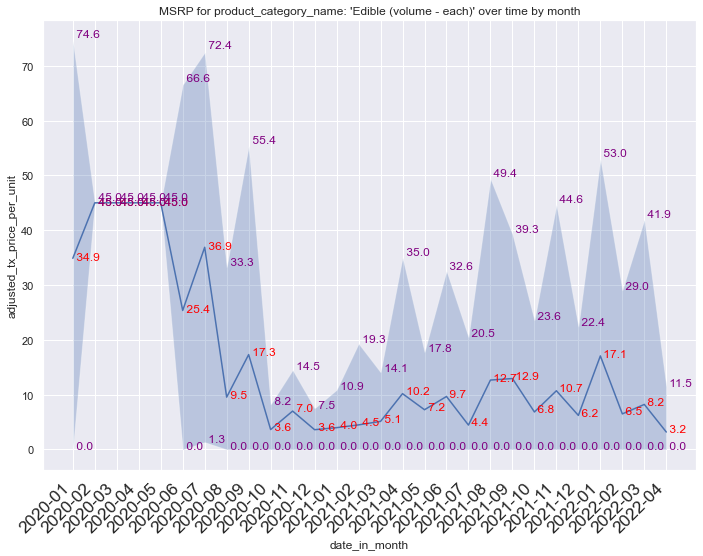

### % outliers for column category name Edible (volume - each) is 4.32% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 13.595009097998439 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


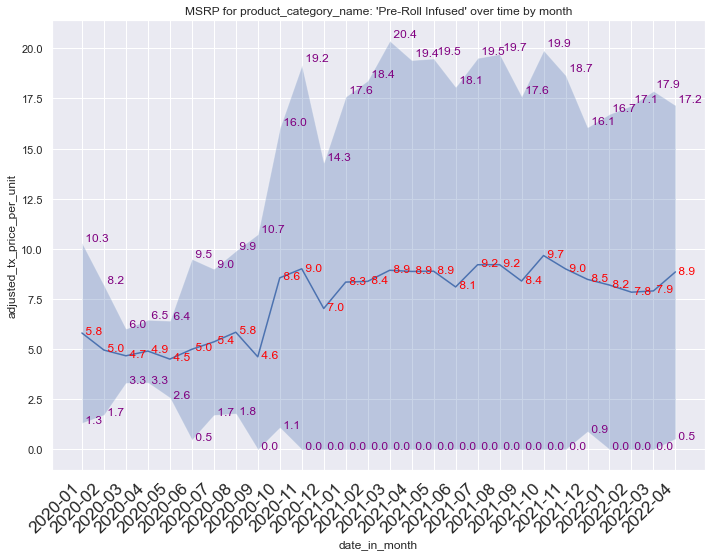

### % outliers for column category name Pre-Roll Infused is 10.97% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 15.853658536585366 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


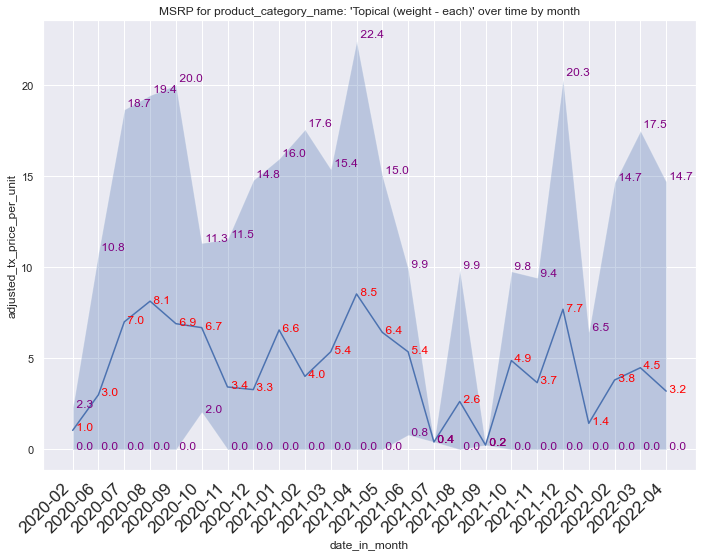

### % outliers for column category name Topical (weight - each) is 25.319999999999997% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.3015873015873 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


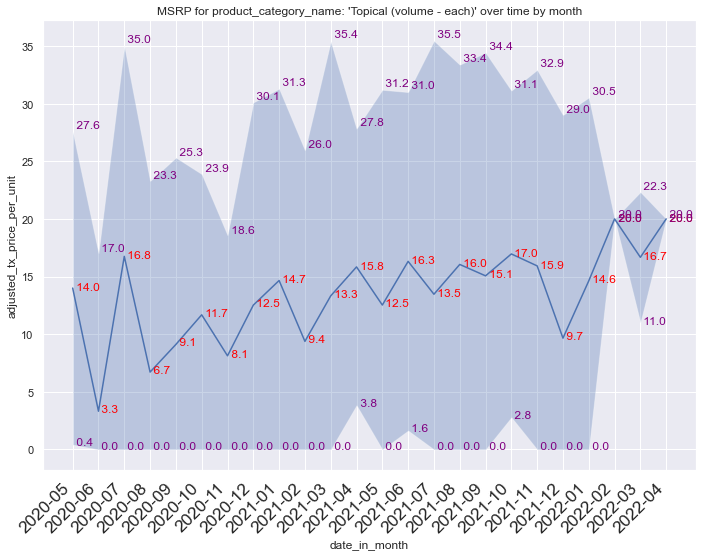

### % outliers for column category name Topical (volume - each) is 31.790000000000003% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.9395088181968023 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


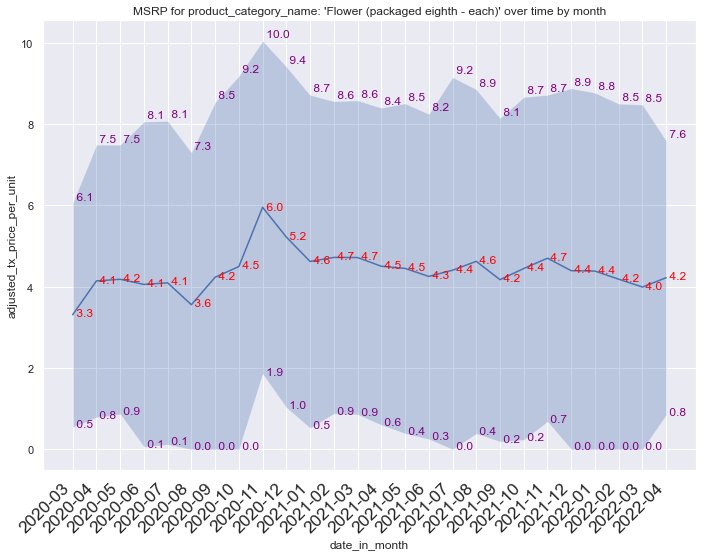

### % outliers for column category name Flower (packaged eighth - each) is 9.58% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


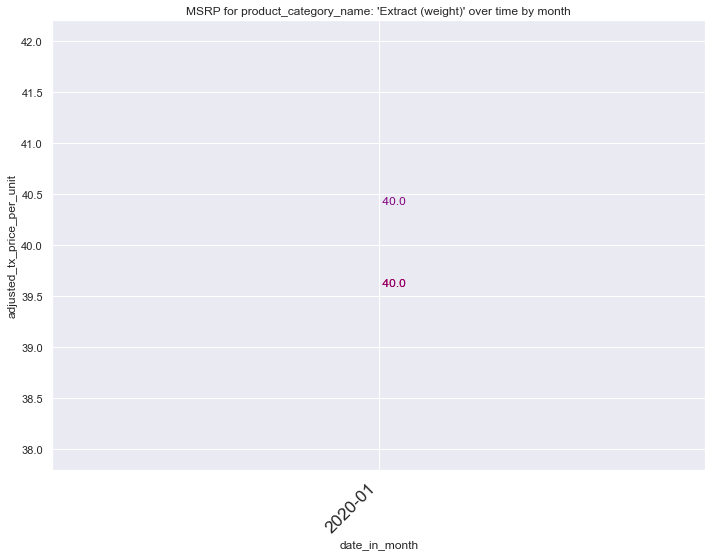

### % outliers for column category name Extract (weight) is 0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Leaf ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 4.205607476635514 %
Number of transactions outliers above Boxplot Whisker Maximum is 18.925233644859812 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


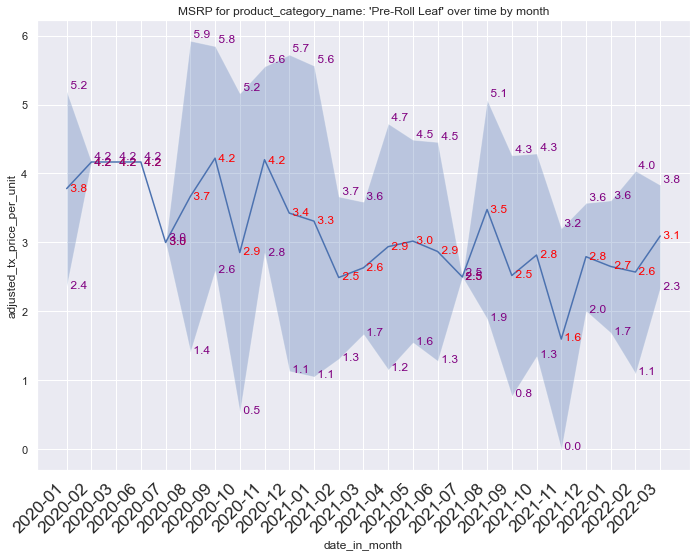

### % outliers for column category name Pre-Roll Leaf is 58.9% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.666666666666667 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


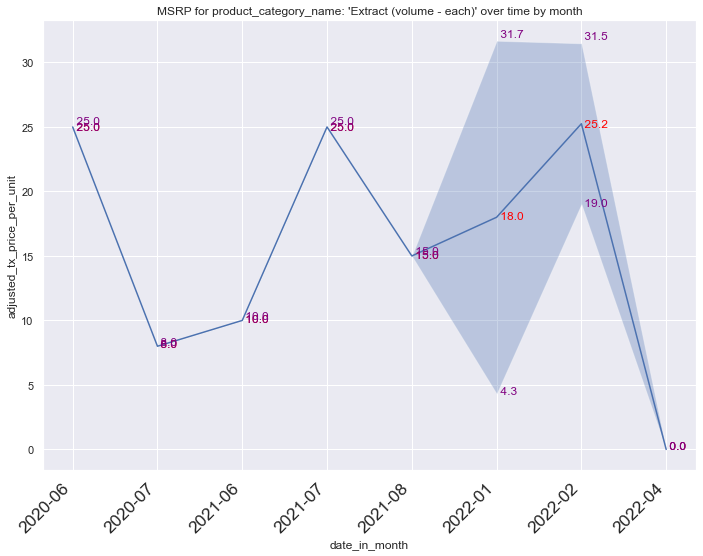

### % outliers for column category name Extract (volume - each) is 60.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Seeds (each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


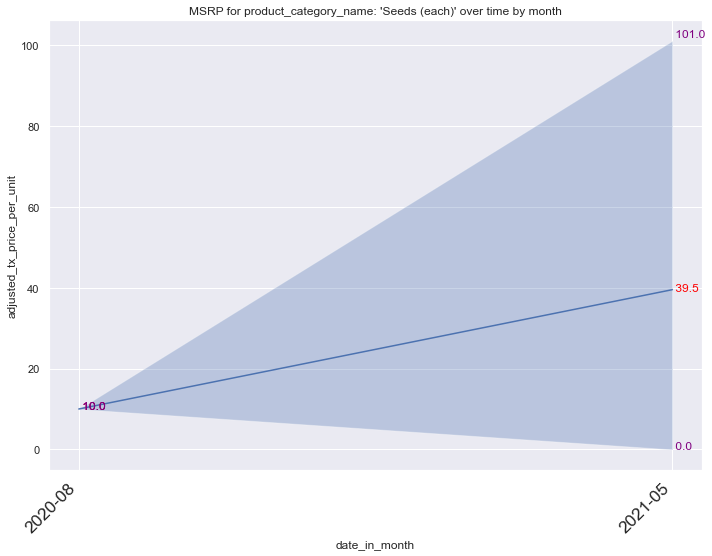

### % outliers for column category name Seeds (each) is 0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.960207052733743 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.642510514396635 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


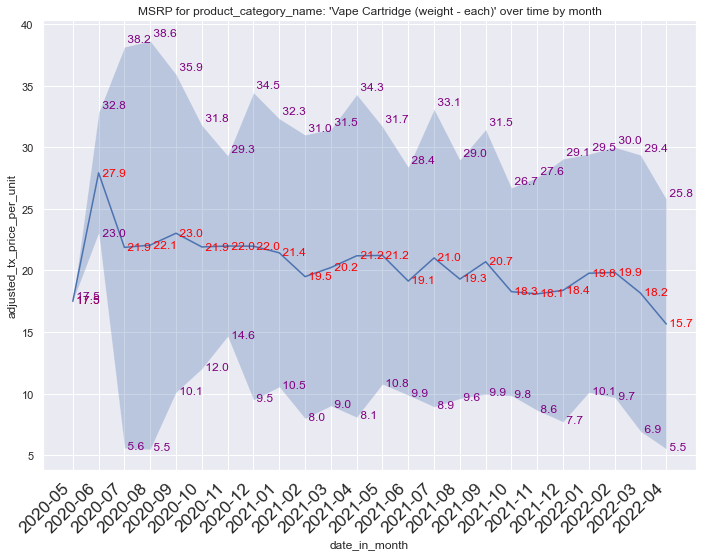

### % outliers for column category name Vape Cartridge (weight - each) is 18.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged quarter - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.8835616438356164 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.705479452054795 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


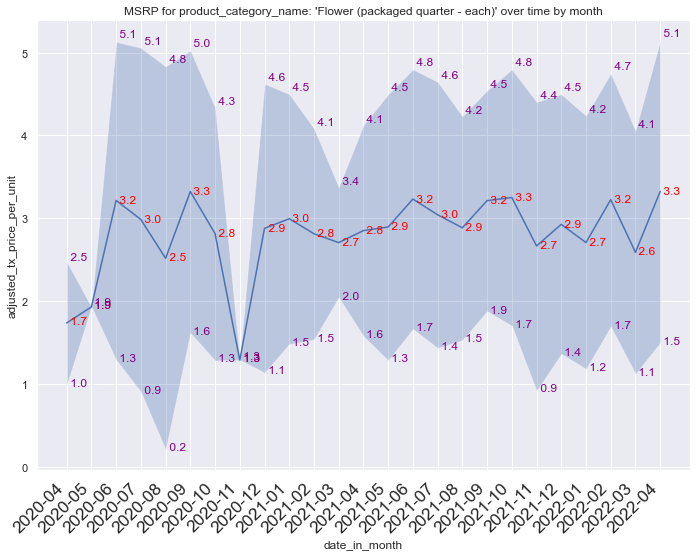

### % outliers for column category name Flower (packaged quarter - each) is 29.330000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 5.81039755351682 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.058103975535168 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


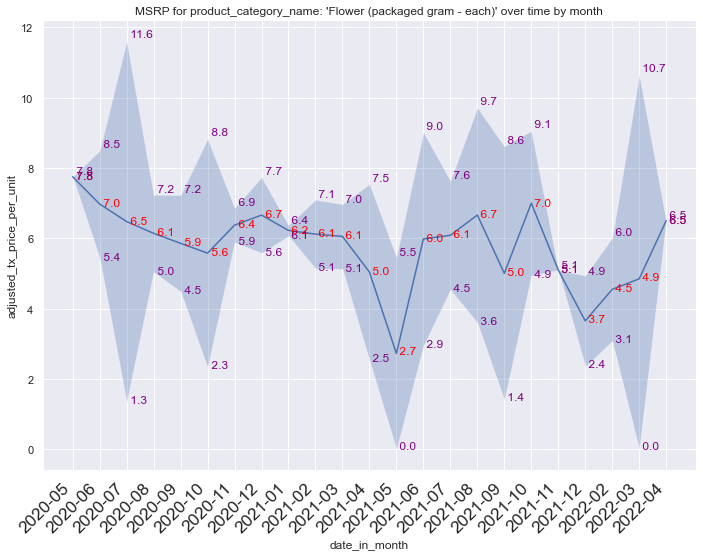

### % outliers for column category name Flower (packaged gram - each) is 49.07% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.3004059539918806 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.855209742895804 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


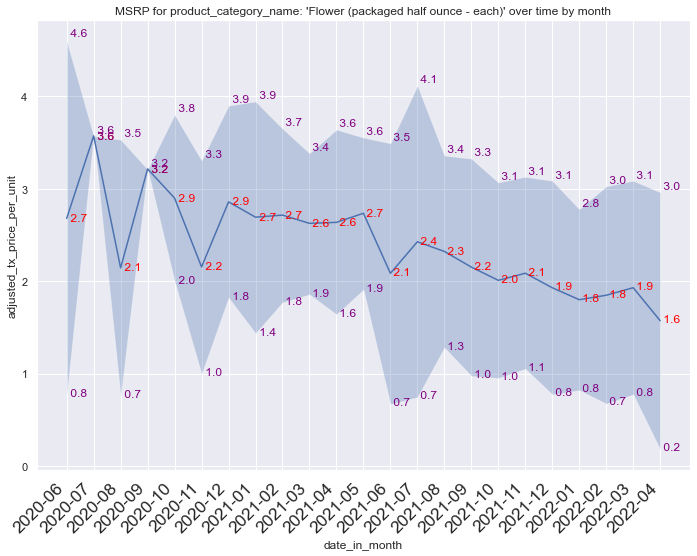

### % outliers for column category name Flower (packaged half ounce - each) is 42.49% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 14.33774834437086 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


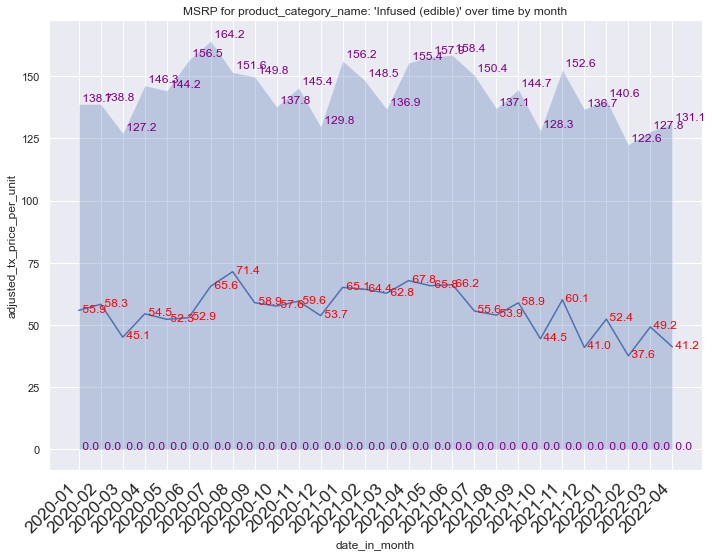

### % outliers for column category name Infused (edible) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate (Each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.669710806697108 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


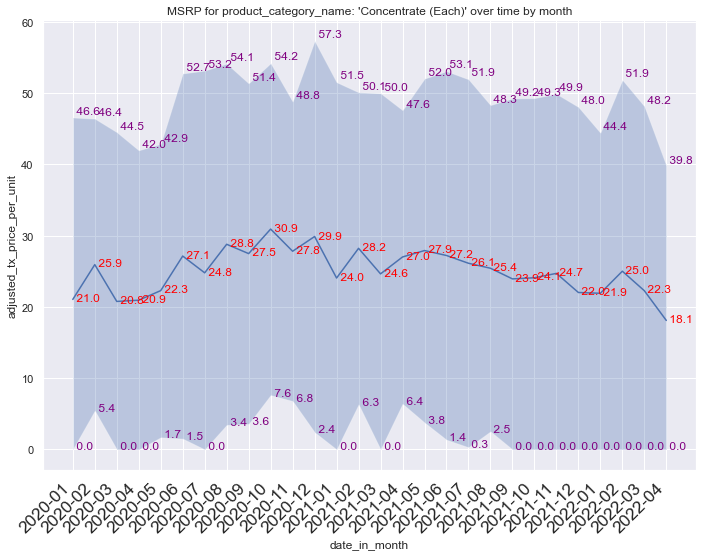

### % outliers for column category name Concentrate (Each) is 23.9% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.44880319148936176 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


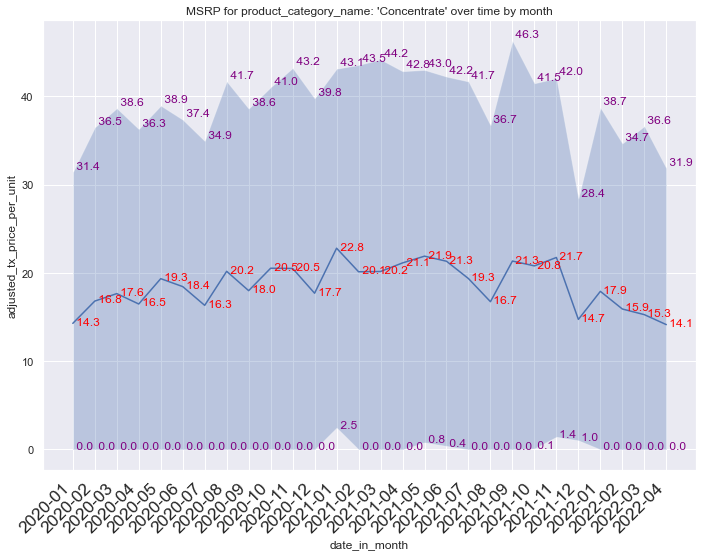

### % outliers for column category name Concentrate is 3.66% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (non-edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.820895522388058 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


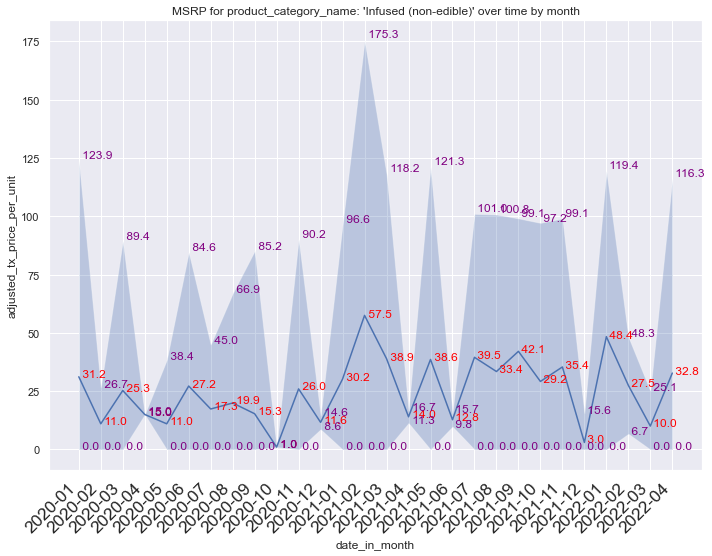

### % outliers for column category name Infused (non-edible) is 17.599999999999998% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


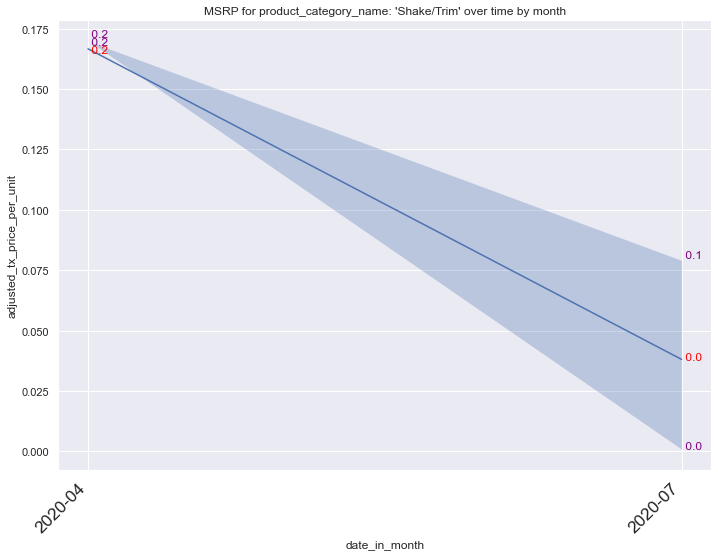

### % outliers for column category name Shake/Trim is 0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 21.052631578947366 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


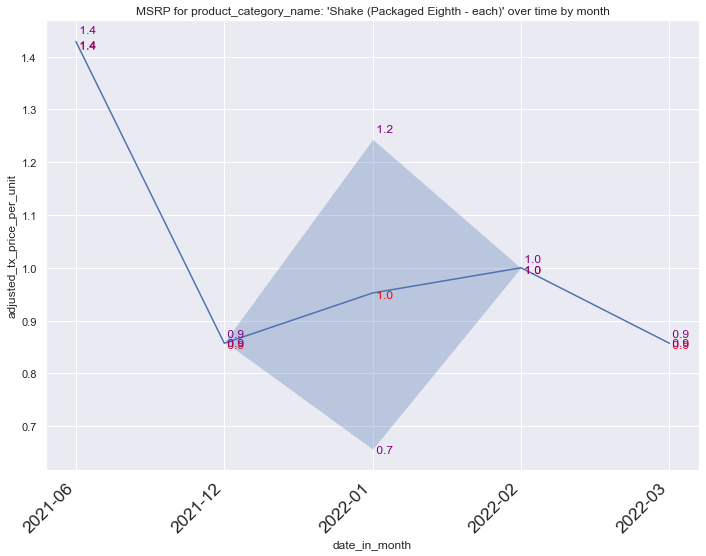

### % outliers for column category name Shake (Packaged Eighth - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.714285714285714 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


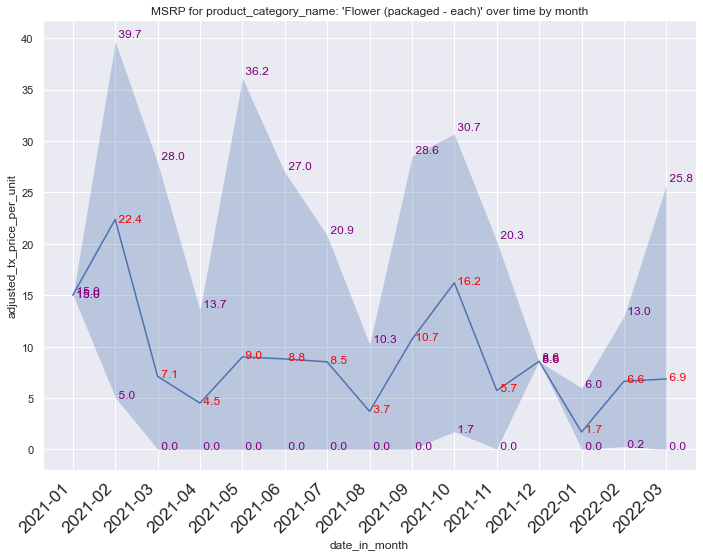

### % outliers for column category name Flower (packaged - each) is 28.89% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Half Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 4.918032786885246 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


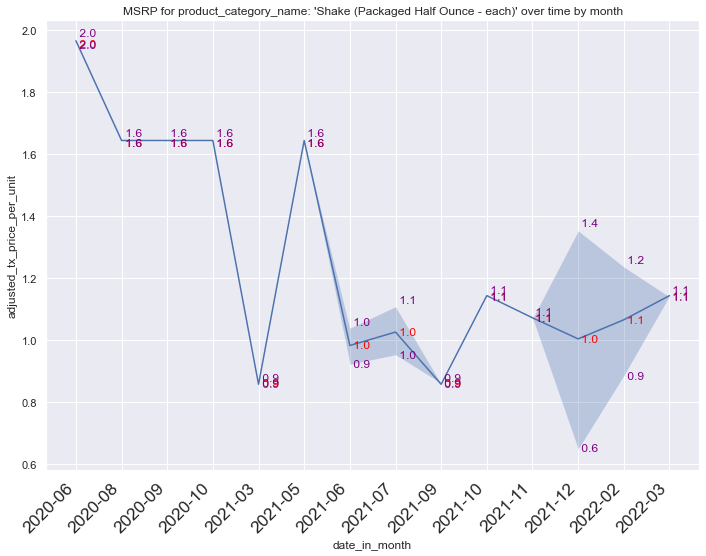

### % outliers for column category name Shake (Packaged Half Ounce - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 20.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.0 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


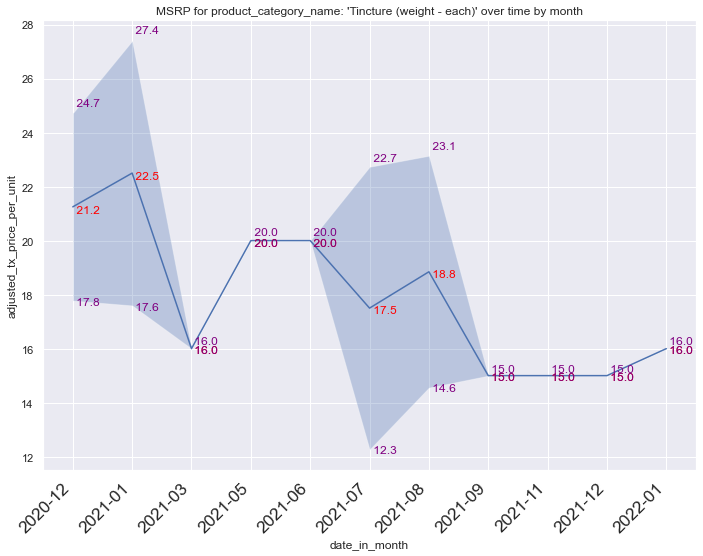

### % outliers for column category name Tincture (weight - each) is 93.55% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.2682926829268295 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


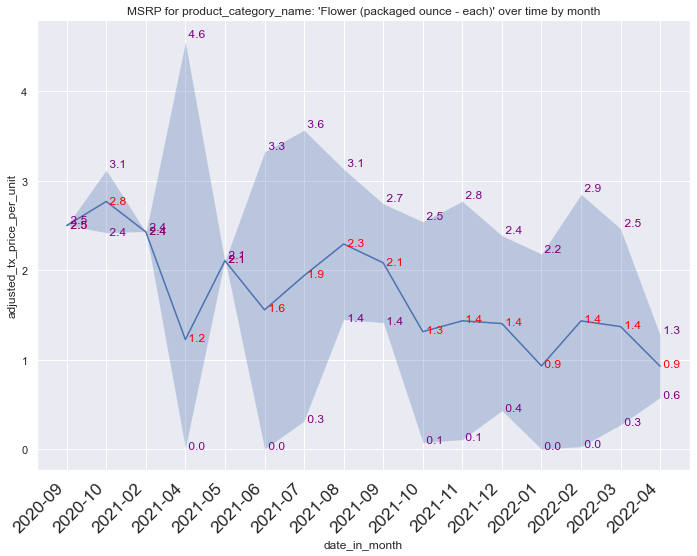

### % outliers for column category name Flower (packaged ounce - each) is 20.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Buds ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.4551247041689423 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


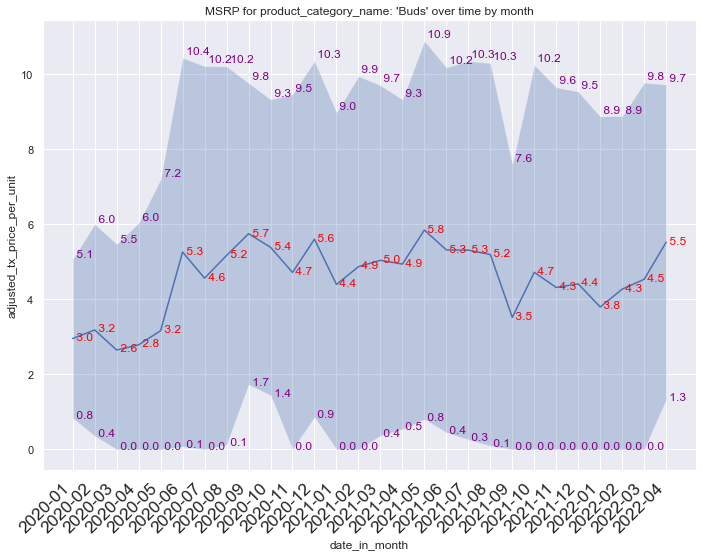

### % outliers for column category name Buds is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 23.52941176470588 %
Number of transactions outliers above Boxplot Whisker Maximum is 11.76470588235294 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


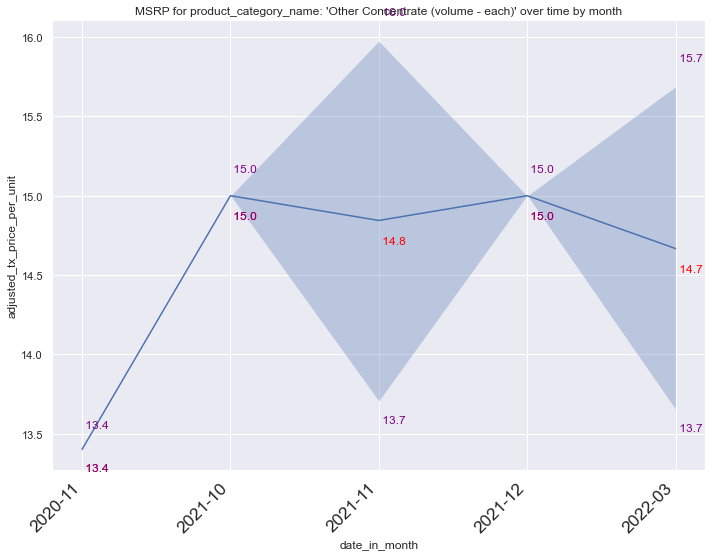

### % outliers for column category name Other Concentrate (volume - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim (by strain) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 4.2 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.6 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


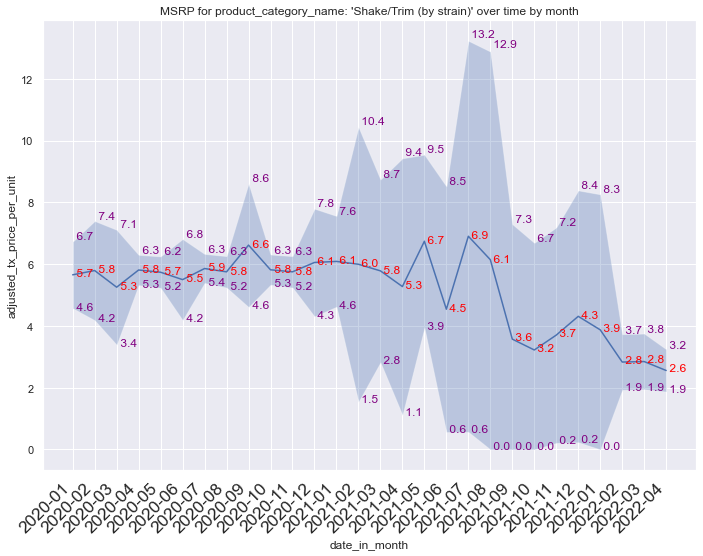

### % outliers for column category name Shake/Trim (by strain) is 0.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.333333333333332 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


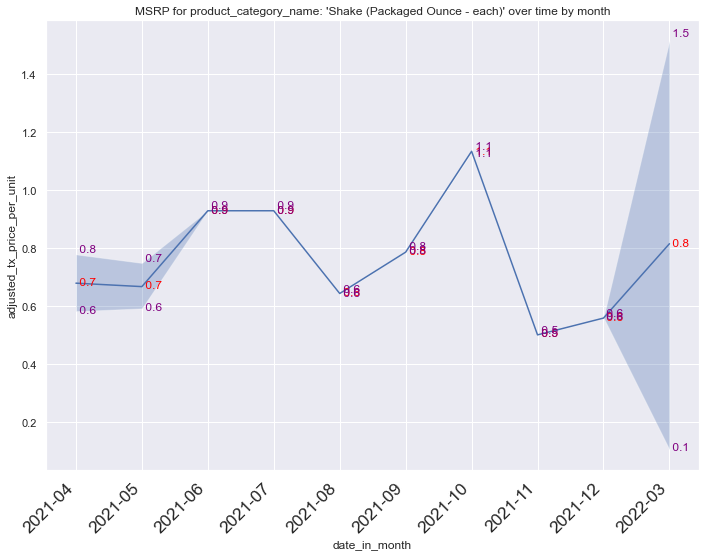

### % outliers for column category name Shake (Packaged Ounce - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


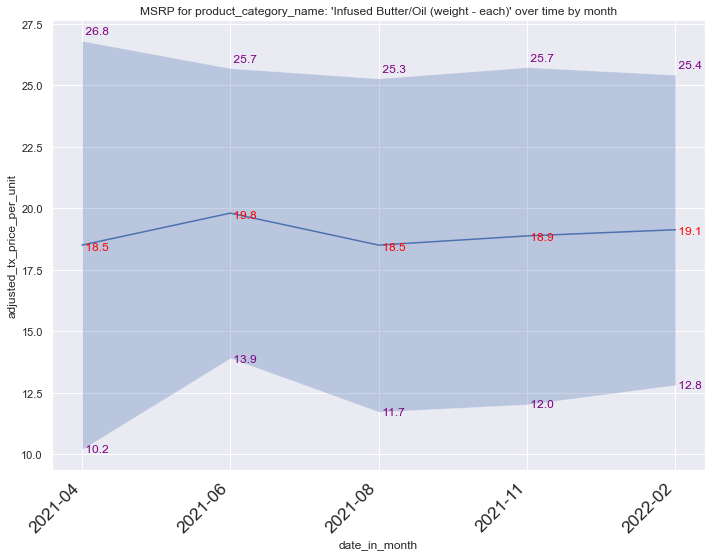

### % outliers for column category name Infused Butter/Oil (weight - each) is 0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.631578947368421 %


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


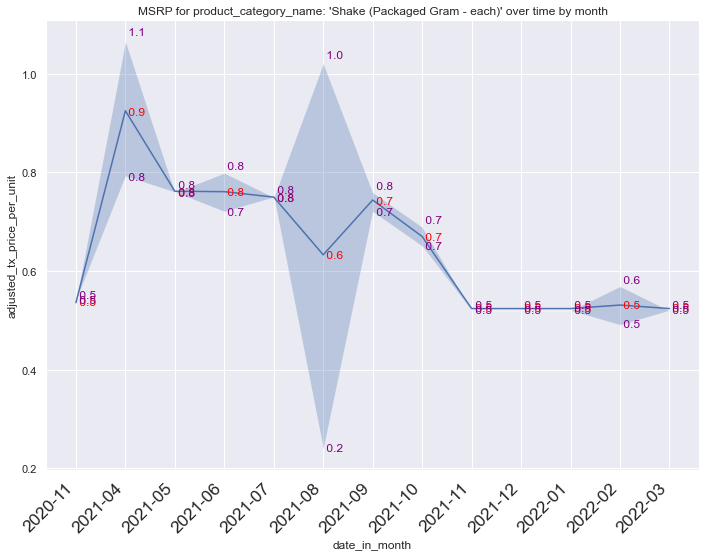

### % outliers for column category name Shake (Packaged Gram - each) is 100.0% ###
### Overall % outliers that are outside of time series band in column product_category_name is 12.9% ###


In [42]:
mba_test.compare_entire_data_band('product_category_name', 'C', use_unit_converted_price=True, ignore_non_unit_extractable_rows=False)

### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.13289577174473163 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.9671015160966614 %


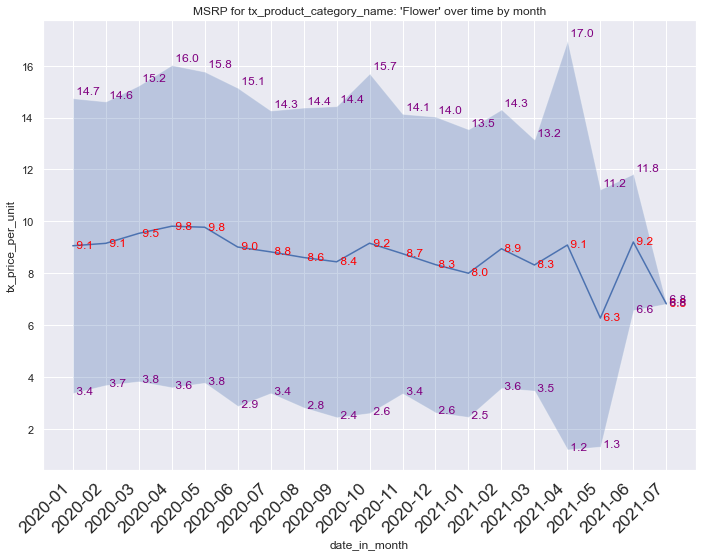

### % outliers for column category name Flower is 19.07% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.9094963761382644 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.14421111317599 %


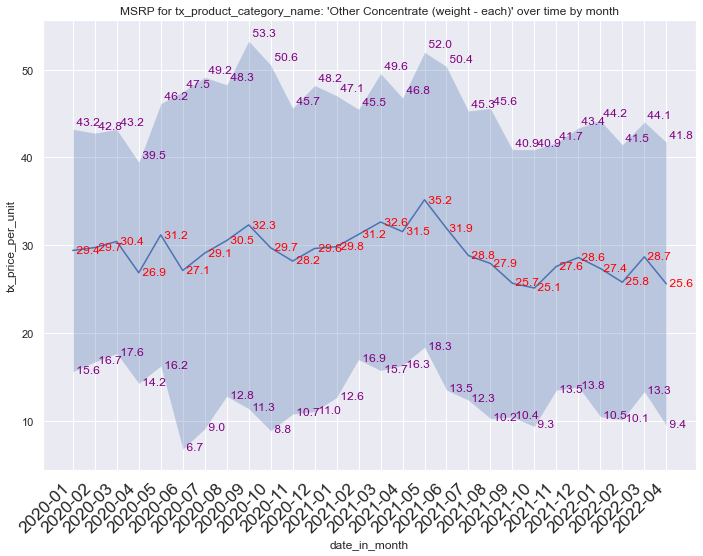

### % outliers for column category name Other Concentrate (weight - each) is 25.180000000000003% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0393828704205106 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.384298049563343 %


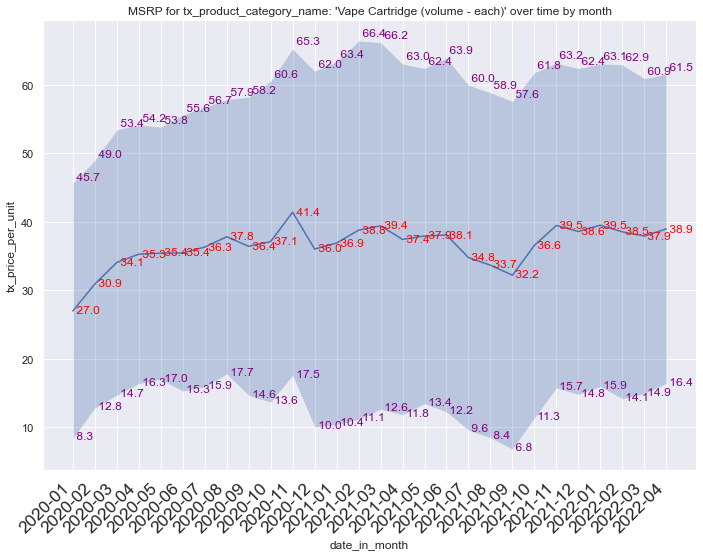

### % outliers for column category name Vape Cartridge (volume - each) is 17.06% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.5893075118980677 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.421980222463003 %


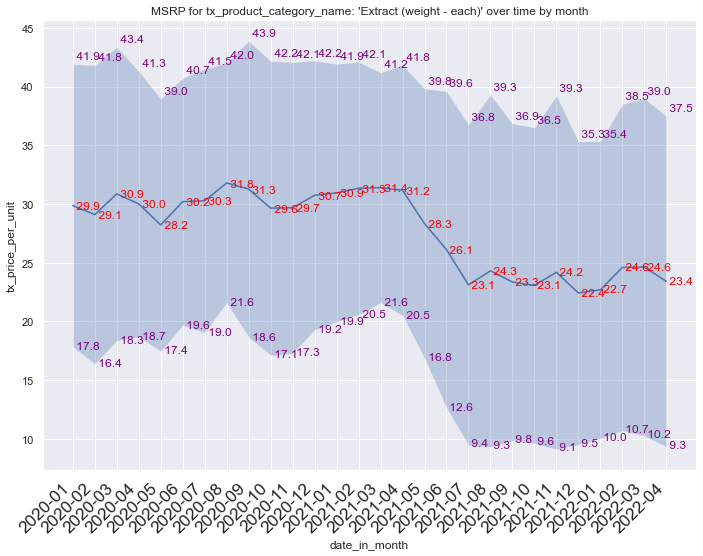

### % outliers for column category name Extract (weight - each) is 18.970000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.912723630586449 %


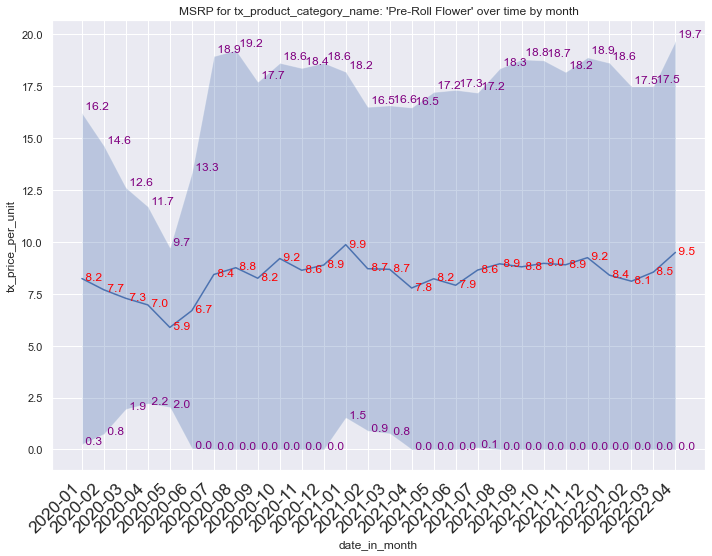

### % outliers for column category name Pre-Roll Flower is 35.17% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 5.357467709659815 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.219392395852283 %


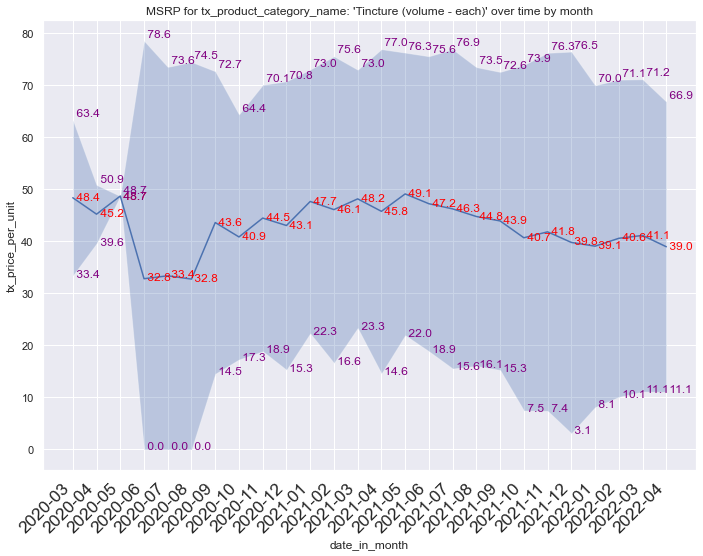

### % outliers for column category name Tincture (volume - each) is 13.98% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.1859755004175483 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.2459180170810556 %


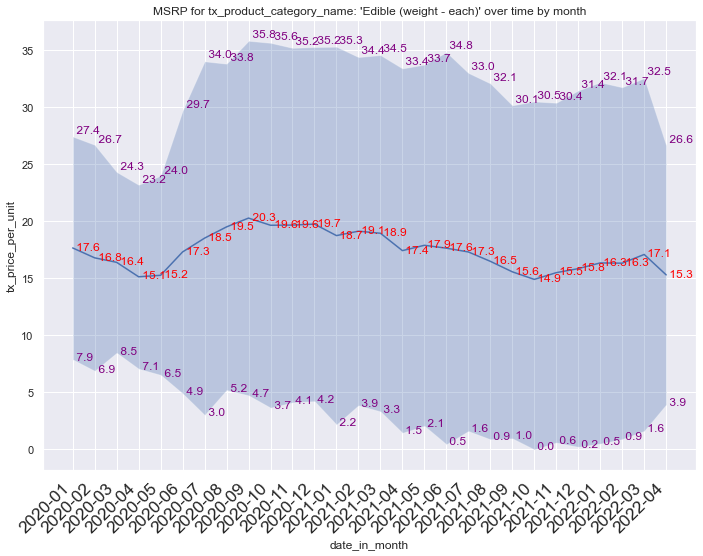

### % outliers for column category name Edible (weight - each) is 5.35% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Edible (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.645168390931103 %


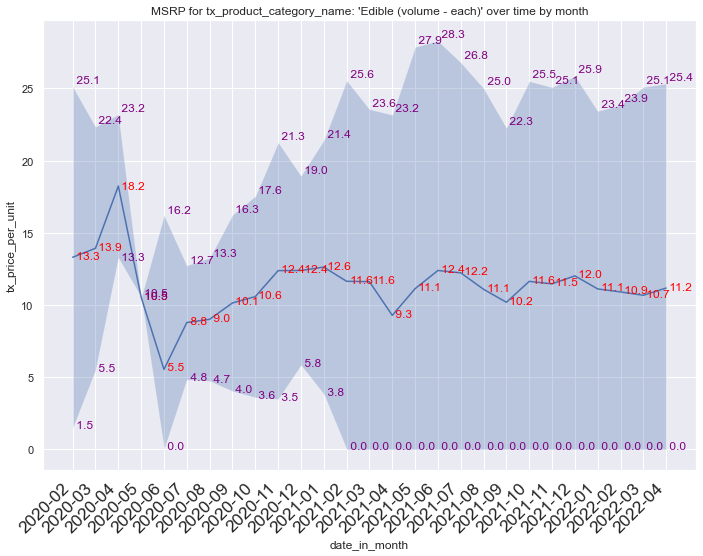

### % outliers for column category name Edible (volume - each) is 8.690000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.10625102677838 %


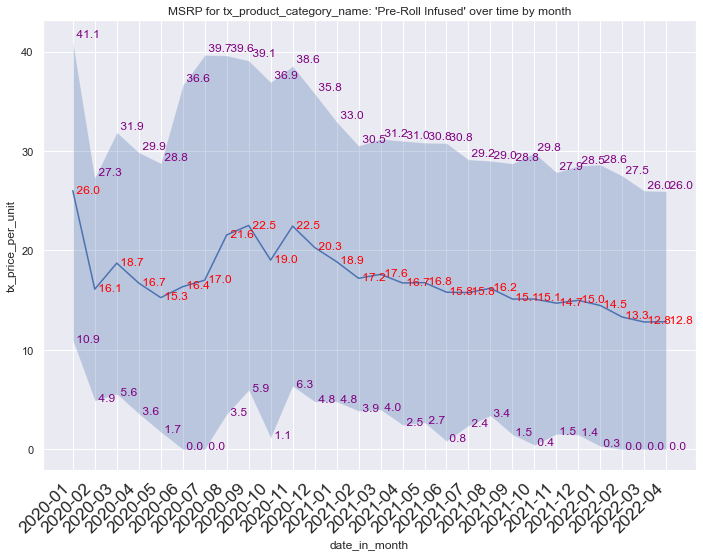

### % outliers for column category name Pre-Roll Infused is 28.46% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.336426914153132 %


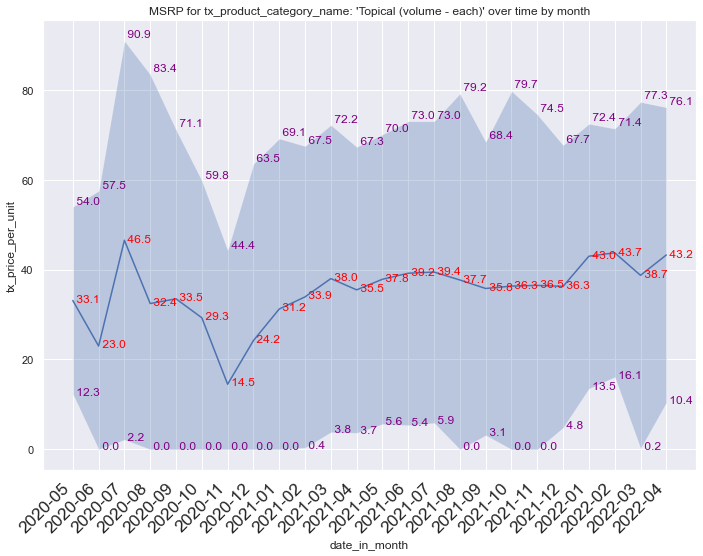

### % outliers for column category name Topical (volume - each) is 21.21% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Topical (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.905397885364495 %


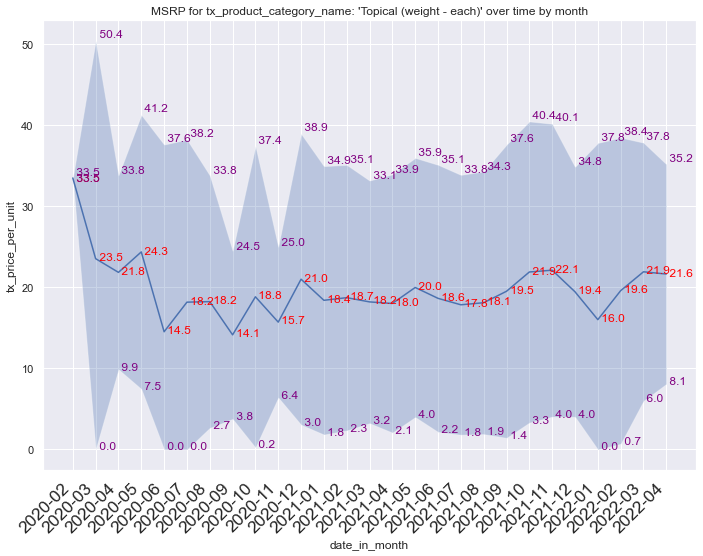

### % outliers for column category name Topical (weight - each) is 32.65% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Capsule (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.818639798488665 %


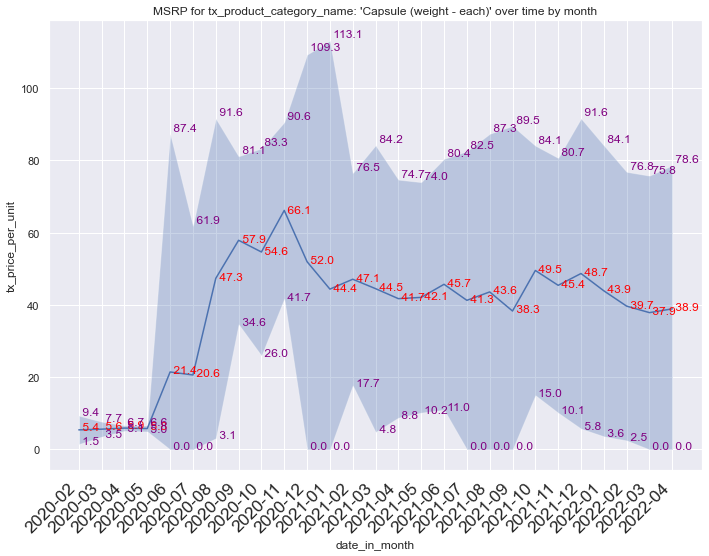

### % outliers for column category name Capsule (weight - each) is 30.320000000000004% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


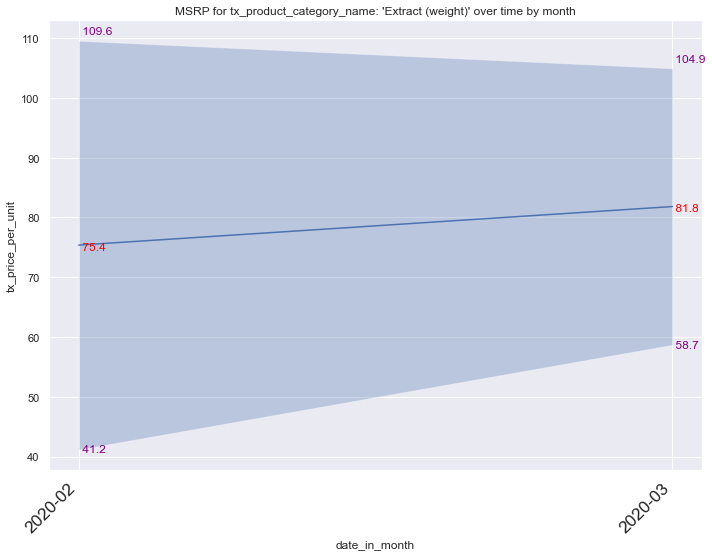

### % outliers for column category name Extract (weight) is 87.72% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.7078062998846807 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.466389416048452 %


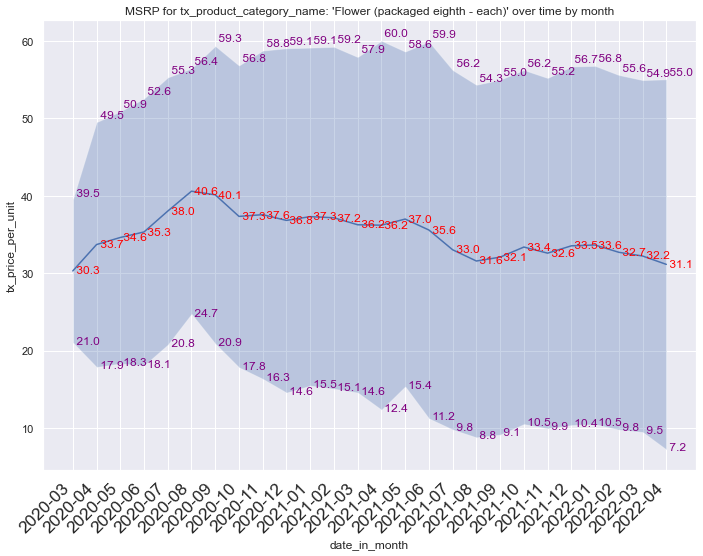

### % outliers for column category name Flower (packaged eighth - each) is 13.350000000000001% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Leaf ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.2643413780081706 %


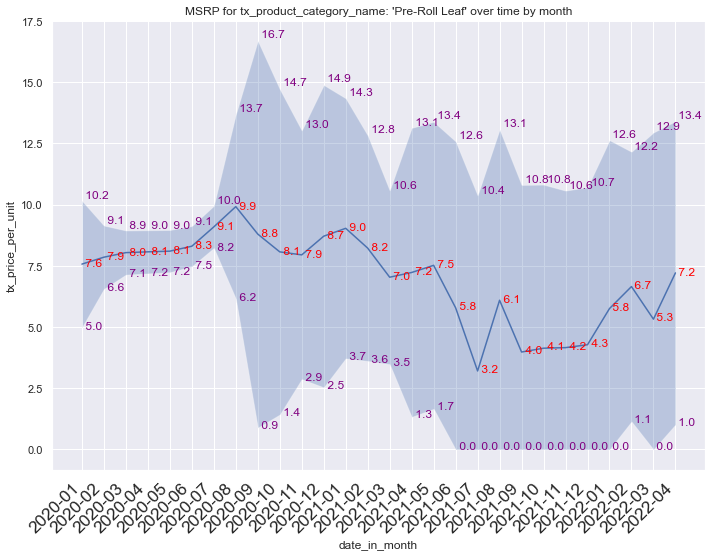

### % outliers for column category name Pre-Roll Leaf is 25.82% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Extract (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.8639308855291578 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.535637149028078 %


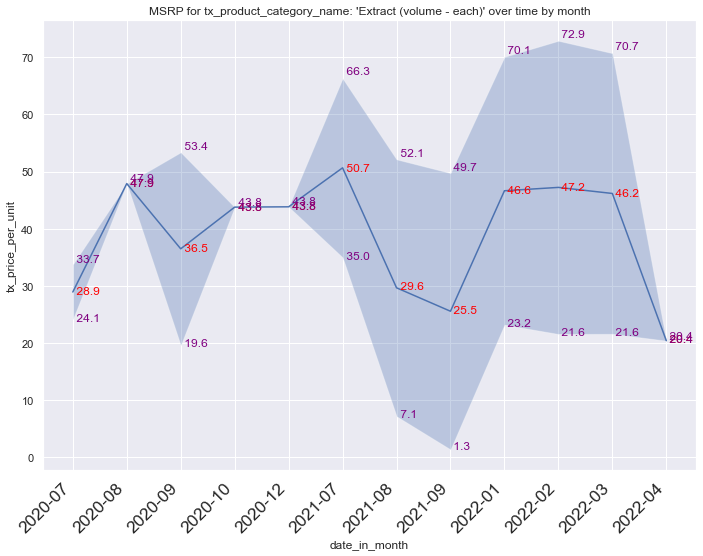

### % outliers for column category name Extract (volume - each) is 39.58% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.38722444103913 %


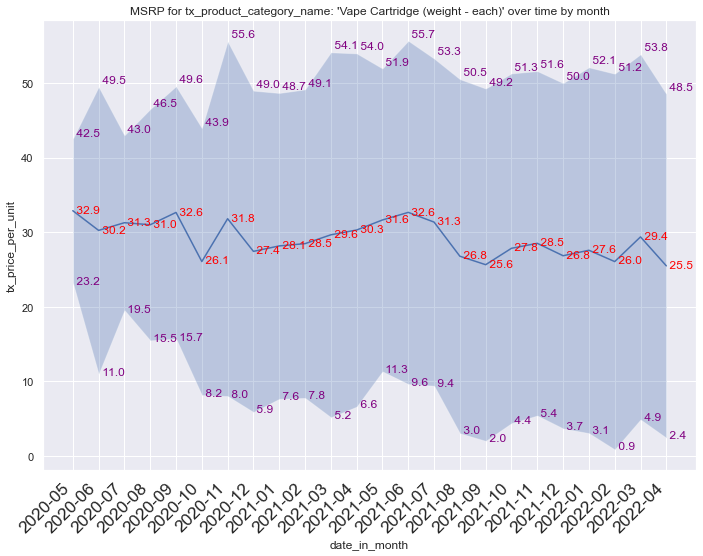

### % outliers for column category name Vape Cartridge (weight - each) is 10.51% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Seeds (each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


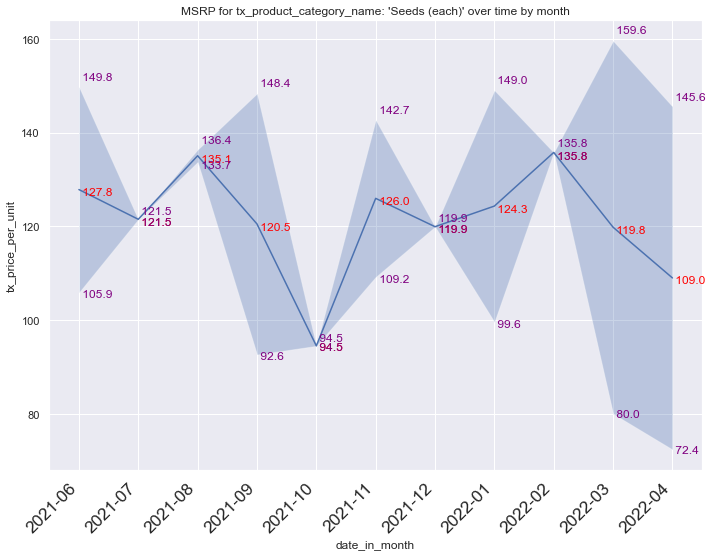

### % outliers for column category name Seeds (each) is 93.67999999999999% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged quarter - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.12440624293146346 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.142049310110835 %


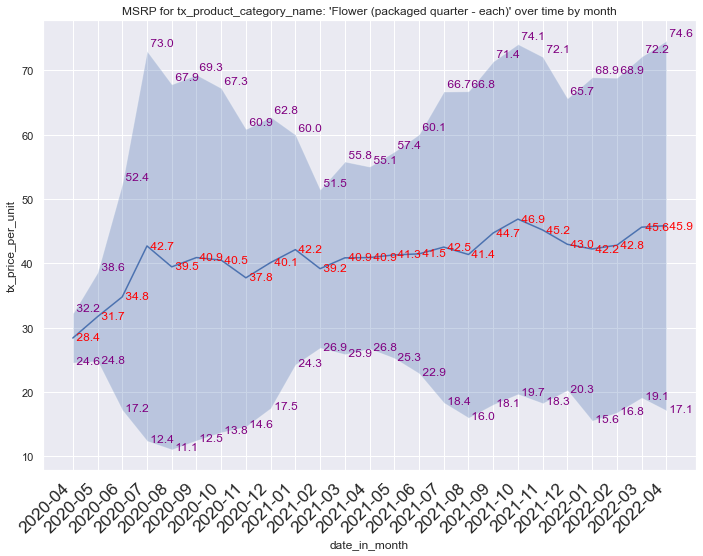

### % outliers for column category name Flower (packaged quarter - each) is 22.07% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.296636085626911 %


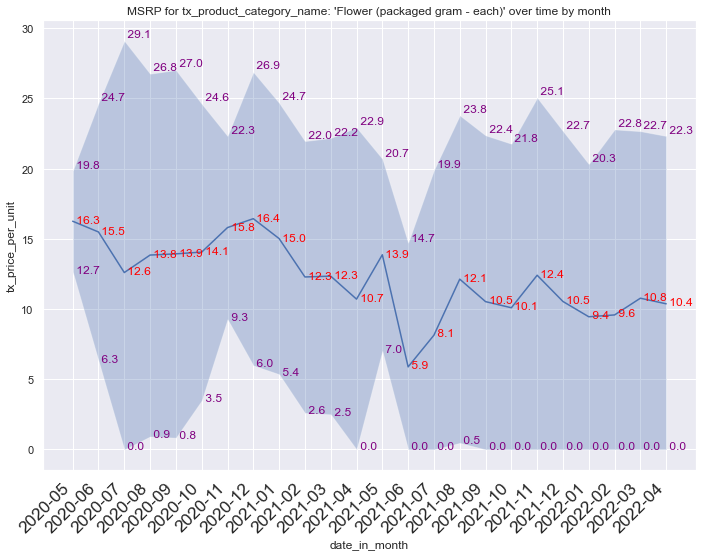

### % outliers for column category name Flower (packaged gram - each) is 9.48% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.698974656606694 %


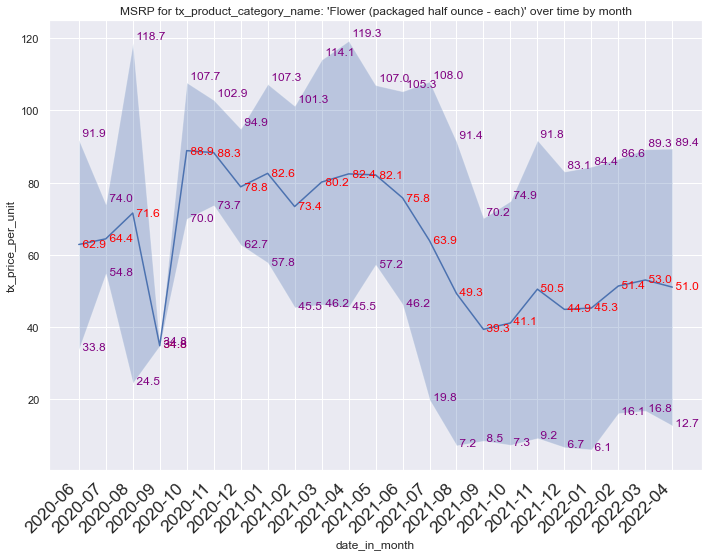

### % outliers for column category name Flower (packaged half ounce - each) is 51.71% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.9120485537693976 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.184271588937434 %


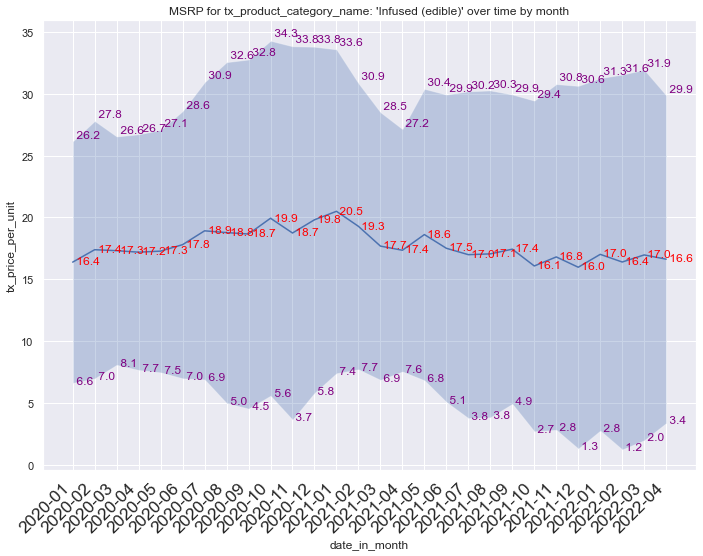

### % outliers for column category name Infused (edible) is 12.590000000000002% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Buds ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


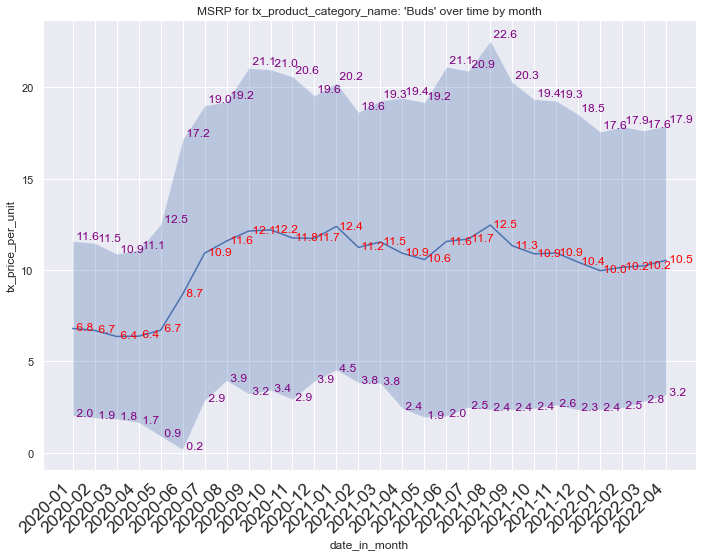

### % outliers for column category name Buds is 1.81% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Bud allocated for extraction ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused (non-edible) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.535353535353535 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.896103896103896 %


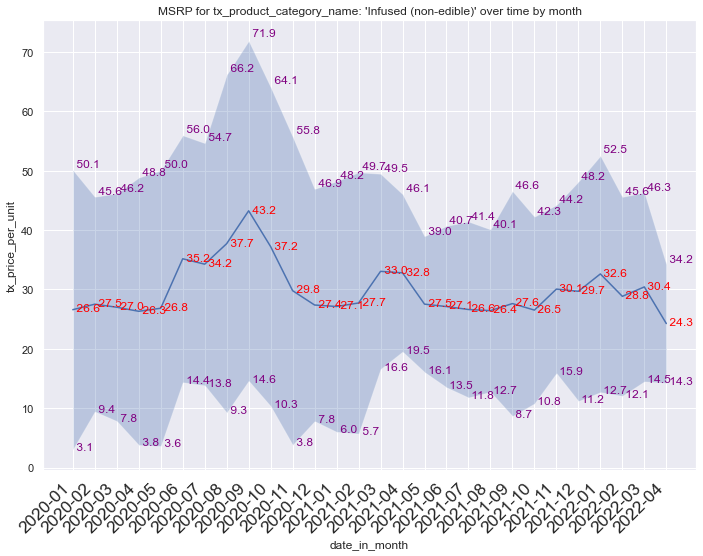

### % outliers for column category name Infused (non-edible) is 63.09% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate (Each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.878284763342235 %


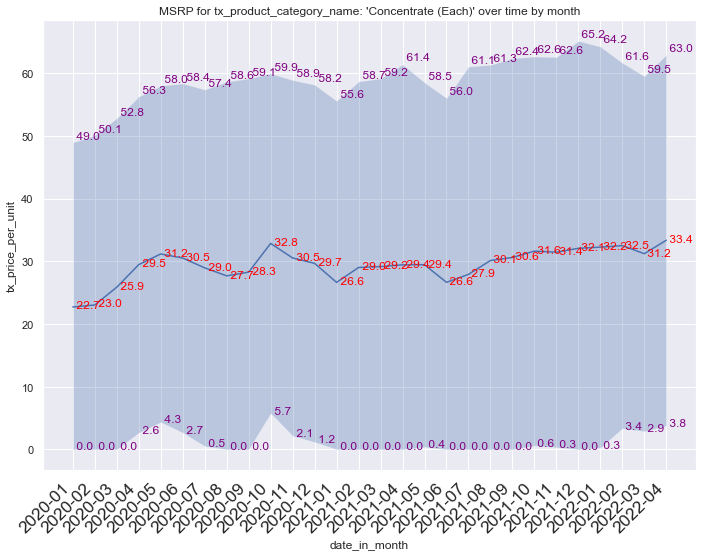

### % outliers for column category name Concentrate (Each) is 5.33% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Concentrate ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 11.511437830397002 %


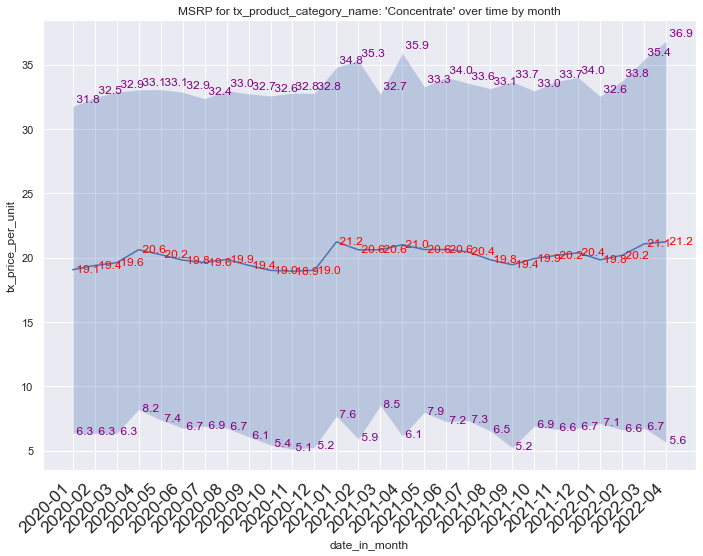

### % outliers for column category name Concentrate is 27.55% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim (by strain) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


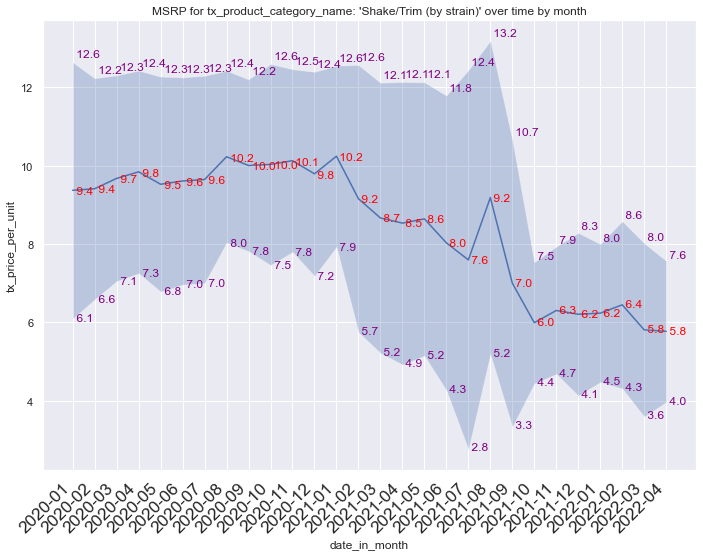

### % outliers for column category name Shake/Trim (by strain) is 27.950000000000003% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Eighth - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


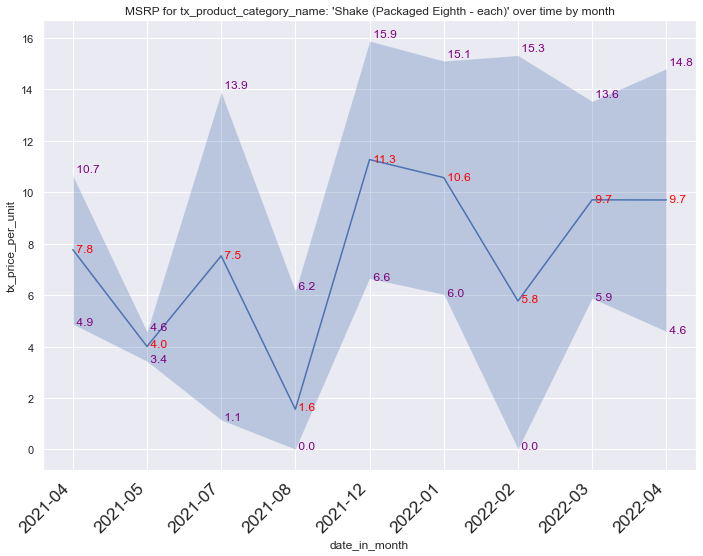

### % outliers for column category name Shake (Packaged Eighth - each) is 72.39% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Half Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.5257009345794392 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


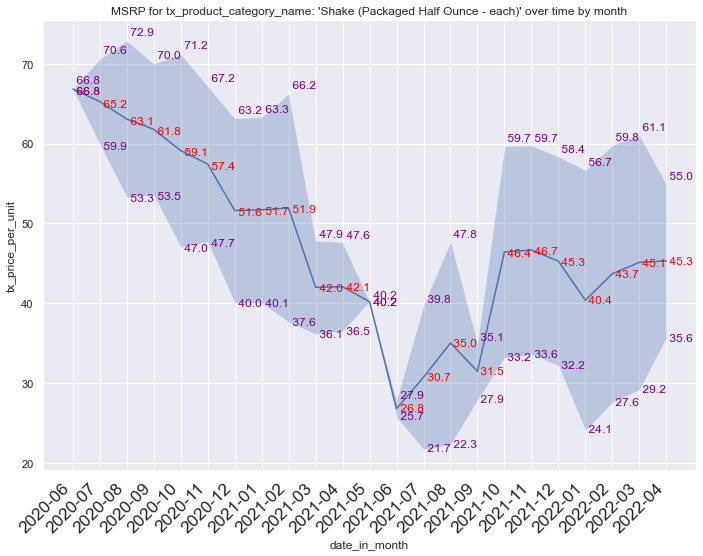

### % outliers for column category name Shake (Packaged Half Ounce - each) is 83.27% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 6.816647919010125 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.3070866141732282 %


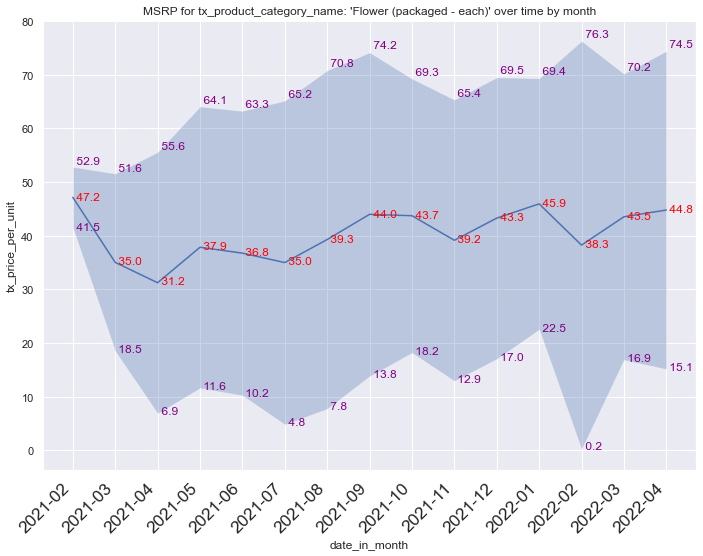

### % outliers for column category name Flower (packaged - each) is 45.04% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Tincture (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.5773195876288657 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.0927835051546393 %


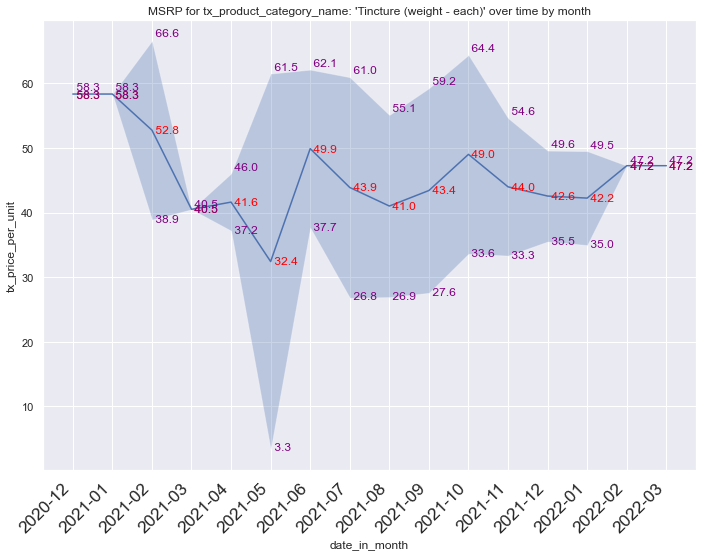

### % outliers for column category name Tincture (weight - each) is 79.36% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Flower (packaged ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 1.8377088305489258 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.856006364359587 %


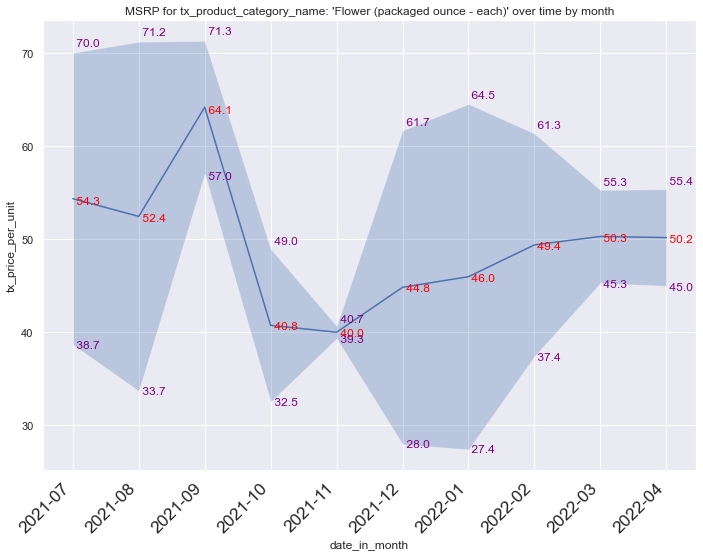

### % outliers for column category name Flower (packaged ounce - each) is 71.06% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 8.640226628895183 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


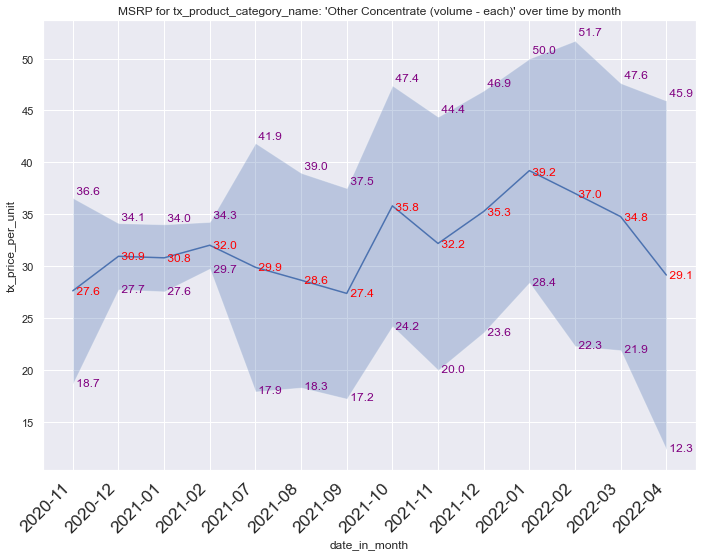

### % outliers for column category name Other Concentrate (volume - each) is 66.67% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (volume - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake/Trim ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


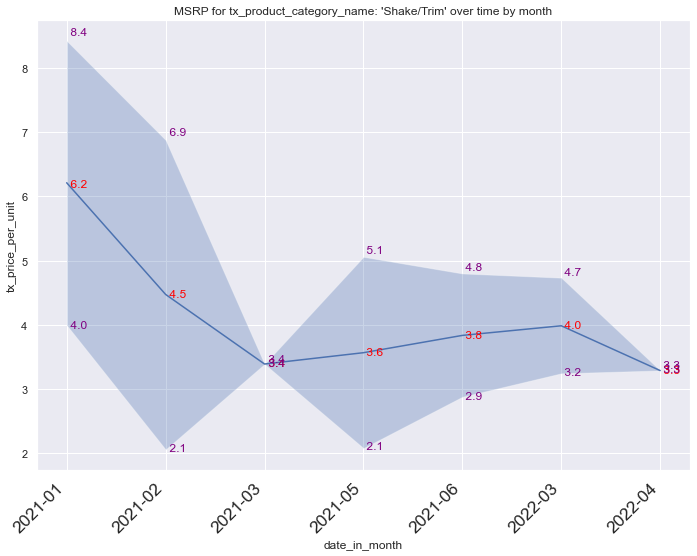

### % outliers for column category name Shake/Trim is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Ounce - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.0442930153321974 %


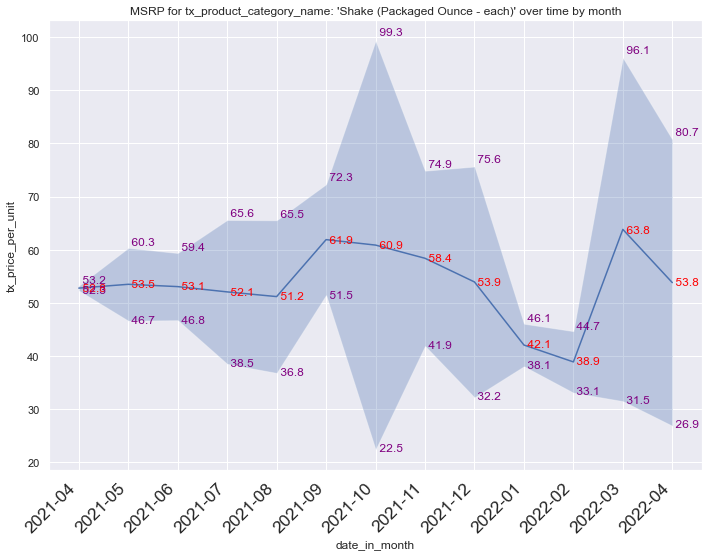

### % outliers for column category name Shake (Packaged Ounce - each) is 100.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Infused Butter/Oil (weight - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 15.294117647058824 %


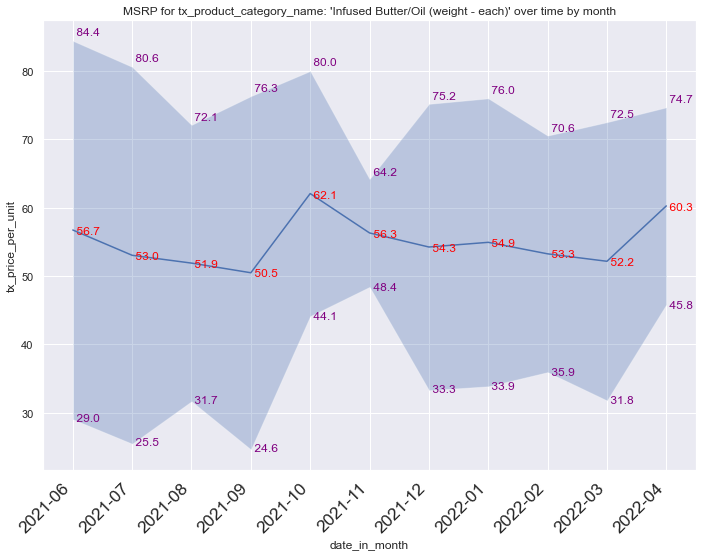

### % outliers for column category name Infused Butter/Oil (weight - each) is 40.0% ###
### RUN BAND ANALYSIS FOR PRODUCT CATEGORY Shake (Packaged Gram - each) ###
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


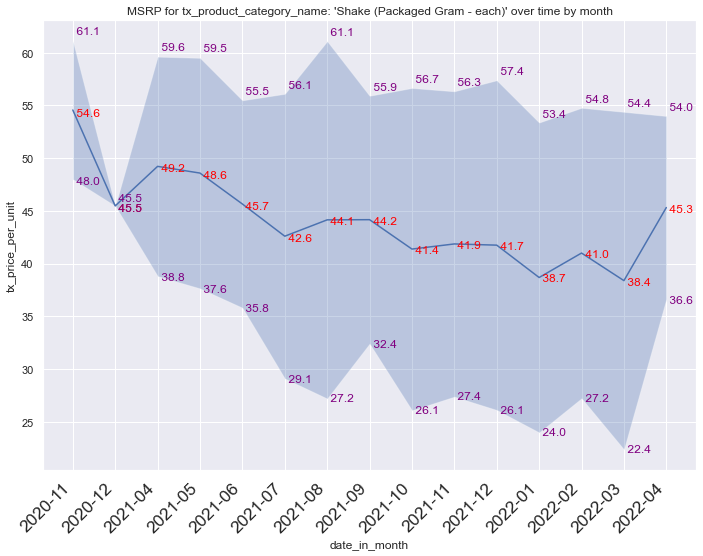

### % outliers for column category name Shake (Packaged Gram - each) is 39.129999999999995% ###
### Overall % outliers that are outside of time series band in column tx_product_category_name is 16.900000000000002% ###


In [43]:
mba_test.compare_entire_data_band('tx_product_category_name', 'S', use_unit_converted_price=False, ignore_non_unit_extractable_rows=False)